# 1- 분석 준비

## 패키지 로드

In [ ]:
## 패키지 설치

!pip install squarify

# 나눔 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (6,915 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123605 files and dire

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter # 숫자 표현
import seaborn as sns
import squarify # 시각화
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose # 시계열 분해 분석

In [ ]:
# 경로 지정
os.chdir('/content/drive/MyDrive/커리어/개인프로젝트/브라질 Olist 이커머스 데이터/임시파일저장')

# 판다스 옵션
pd.set_option('display.max_columns', None)


# 스타일
plt.style.use('seaborn-darkgrid')
plt.rc('font', family='NanumSquare') # 한글 폰트 지정

<ipython-input-4-03fe974fe052>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [ ]:
# 임시 파일 불러오기
copy_full_df = pd.read_parquet('full_df.parquet', engine='pyarrow')

## 데이터 로드

### 1) 고객 정보
- Customer ID
- Customer Unique ID
- ZIP code
- City
- State

In [ ]:
customer_path = "/content/drive/MyDrive/커리어/개인프로젝트/브라질 Olist 이커머스 데이터/데이터셋/olist_customers_dataset.csv"
df_customer = pd.read_csv(customer_path)
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### 2) 주문 아이템
- Order ID (주문 ID)
- Product ID (제품 ID)
- Price (제품 가격)
- Freight value (운송비)

In [ ]:
item_path = "/content/drive/MyDrive/커리어/개인프로젝트/브라질 Olist 이커머스 데이터/데이터셋/olist_order_items_dataset.csv"
df_item = pd.read_csv(item_path)
df_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### 3) 지불 방식
- 주문 ID별 지불 방식, 지불금액

In [ ]:
payment_path = "/content/drive/MyDrive/커리어/개인프로젝트/브라질 Olist 이커머스 데이터/데이터셋/olist_order_payments_dataset.csv"
df_payment = pd.read_csv(payment_path)
df_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### 4) 주문 상태
- 각 주문 ID별 주문 상태, 배송 정보

In [ ]:
order_path = "/content/drive/MyDrive/커리어/개인프로젝트/브라질 Olist 이커머스 데이터/데이터셋/olist_orders_dataset.csv"
df_order = pd.read_csv(order_path)
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### 5) 제품 정보
- 제품 카테고리, 제품의 사이즈 등

In [ ]:
product_path = "/content/drive/MyDrive/커리어/개인프로젝트/브라질 Olist 이커머스 데이터/데이터셋/olist_products_dataset.csv"
category_path = '/content/drive/MyDrive/커리어/개인프로젝트/브라질 Olist 이커머스 데이터/데이터셋/product_category_name_translation.csv'
df_product = pd.read_csv(product_path)
category_label = pd.read_csv(category_path)

df_product = df_product.merge(category_label, how='left', on='product_category_name')

df_product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


### 6) 리뷰 정보
- 리뷰 스코어, 코멘트 등

In [ ]:
review_path = "/content/drive/MyDrive/커리어/개인프로젝트/브라질 Olist 이커머스 데이터/데이터셋/olist_order_reviews_dataset.csv"
df_review = pd.read_csv(review_path)
df_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### 7) 판매자 정보


In [ ]:
seller_path = "/content/drive/MyDrive/커리어/개인프로젝트/브라질 Olist 이커머스 데이터/데이터셋/olist_sellers_dataset.csv"
df_seller = pd.read_csv(seller_path)
df_seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## 데이터세트 머지

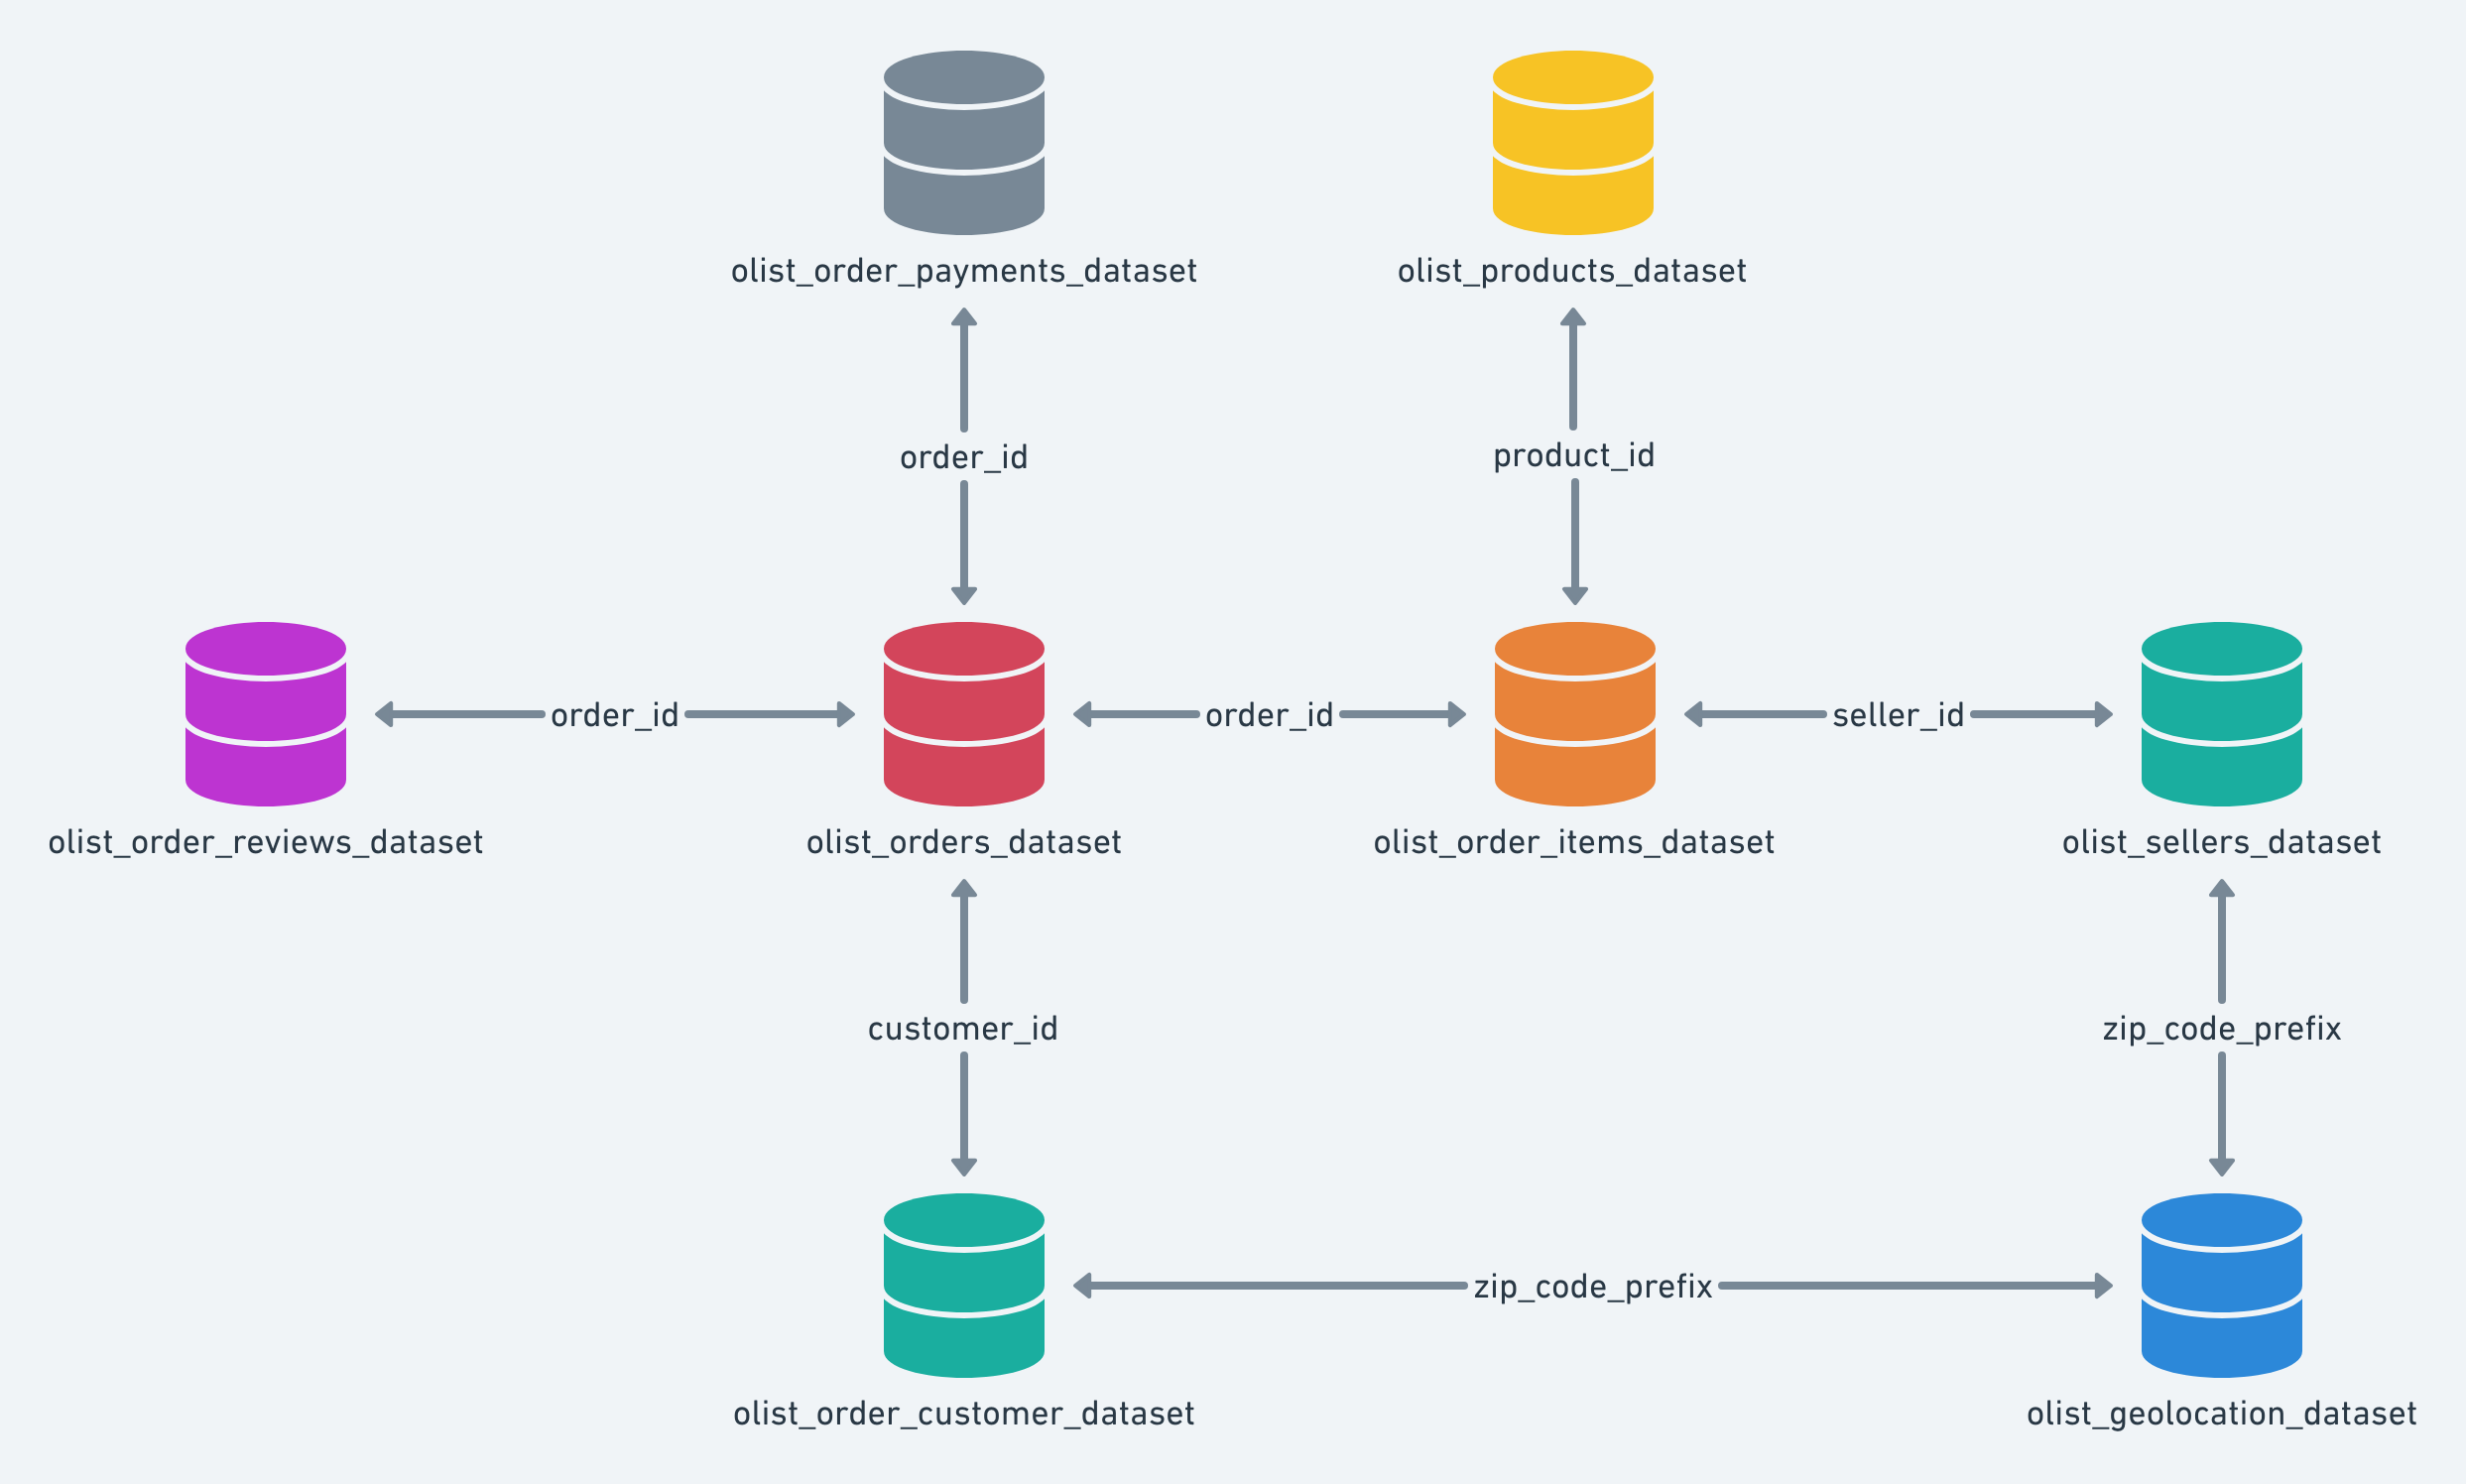

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# Open the image.
img = cv2.imread("/content/drive/MyDrive/커리어/개인프로젝트/브라질 Olist 이커머스 데이터/데이터셋/data schema.png")
cv2_imshow(img)

In [ ]:
full_df = df_order.merge(df_item, how='left', on='order_id')
full_df = full_df.merge(df_customer, how='outer', on='customer_id')
full_df = full_df.merge(df_payment, how='outer', on='order_id')
full_df = full_df.merge(df_product, how='outer', on='product_id')
full_df = full_df.merge(df_seller, how='outer', on='seller_id')
full_df = full_df.merge(df_review, how='outer', on='order_id')


In [ ]:
# 분석 데이터 기간 제한 (2018년 8월 31일까지)
full_df['order_purchase_timestamp'] = pd.to_datetime(copy_full_df['order_purchase_timestamp'])
full_df = full_df[full_df['order_purchase_timestamp'] <= pd.Timestamp('2018-08-31 23:59:59')]

<ipython-input-38-6e89d10727b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['order_purchase_timestamp'] = pd.to_datetime(copy_full_df['order_purchase_timestamp'])


(119123, 40)


In [ ]:
# 데이터 요약

def summary_df(df):
  summary = {
      '변수명':[],
      '데이터 타입':[],
      '결측치 개수':[],
      '유니크 데이터 수':[],
      '첫 번째 레코드 값':[],
      '두 번째 레코드 값':[]
  }

  for col in df.columns:
    summary['변수명'].append(col)
    summary['데이터 타입'].append(df[col].dtype)
    summary['결측치 개수'].append(df[col].isna().sum())
    summary['유니크 데이터 수'].append(df[col].nunique())
    summary['첫 번째 레코드 값'].append(df[col].iloc[0] if len(df) > 0 else None)
    summary['두 번째 레코드 값'].append(df[col].iloc[1] if len(df) > 1 else None)

  summary_df = pd.DataFrame(summary)
  return summary_df


summary_df(full_df)

,변수명,데이터 타입,결측치 개수,유니크 데이터 수,첫 번째 레코드 값,두 번째 레코드 값
0,order_id,object,0,99441,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7
1,customer_id,object,0,99441,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d
2,order_status,object,0,8,delivered,delivered
3,order_purchase_timestamp,object,0,98875,2017-10-02 10:56:33,2017-10-02 10:56:33
4,order_approved_at,object,177,90733,2017-10-02 11:07:15,2017-10-02 11:07:15
5,order_delivered_carrier_date,object,2086,81018,2017-10-04 19:55:00,2017-10-04 19:55:00
6,order_delivered_customer_date,object,3421,95664,2017-10-10 21:25:13,2017-10-10 21:25:13
7,order_estimated_delivery_date,object,0,459,2017-10-18 00:00:00,2017-10-18 00:00:00
8,order_item_id,float64,833,21,1.0,1.0
9,product_id,object,833,32951,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a


In [ ]:
# # 임시 파일 저장
# full_df.to_parquet('full_df.parquet', engine='pyarrow', compression='snappy')

In [ ]:
# # 임시 파일 불러오기
# copy_full_df = pd.read_parquet('full_df.parquet', engine='pyarrow')

In [ ]:
# copy_full_df = full_df.copy()

In [ ]:
## 상품 주문 시점 정보 추가

# 문자열을 datetime 형식으로 변환
copy_full_df['order_purchase_timestamp'] = pd.to_datetime(copy_full_df['order_purchase_timestamp'])

# 2- 데이터 EDA 분석

## 1) 추세 분석

### 1.1) 주문량 추세 분석

In [ ]:
# 주문 시점 범위 확인
copy_full_df['order_purchase_date'].sort_values()

,order_purchase_date
86220,2016-09-04
86219,2016-09-04
97414,2016-09-05
52411,2016-09-13
109229,2016-09-15
...,...
52547,2018-08-30
53074,2018-08-30
52477,2018-08-30
52575,2018-08-30


In [ ]:
# 주문 날짜별 주문량 확인
copy_full_df['order_purchase_date'] = copy_full_df['order_purchase_timestamp'].dt.date
date_order_cnt = copy_full_df.groupby('order_purchase_date', as_index=False)['order_id'].count()

# 주별 일 평균 주문량 확인
copy_full_df['order_purchase_week'] = copy_full_df['order_purchase_timestamp'].dt.to_period('W').apply(lambda x: x.start_time)
week_order_cnt = copy_full_df.groupby('order_purchase_week', as_index=False)['order_id'].count()
week_order_cnt['order_cnt'] = week_order_cnt['order_id']/7

# 월간 주문량 확인
copy_full_df['order_purchase_month'] = copy_full_df['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()
monthly_order_cnt = copy_full_df.groupby('order_purchase_month', as_index=False)['order_id'].count()

<ipython-input-11-2c7d6ab1e6c5>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


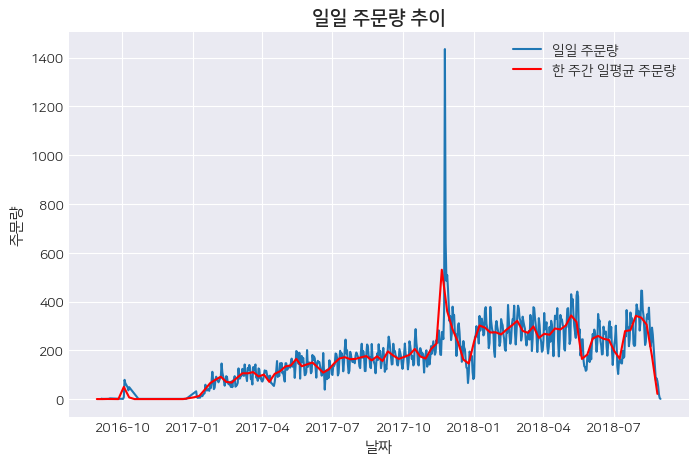

In [ ]:
## 주문 날짜별 주문량 시각화

# 스타일
plt.style.use('seaborn-darkgrid')
plt.rc('font', family='NanumSquare') # 한글 폰트 지정

# 그래프 크기
plt.figure(figsize=(8, 5))

plt.plot(date_order_cnt['order_purchase_date'], date_order_cnt['order_id'], linestyle='-', label='일일 주문량')
plt.plot(week_order_cnt['order_purchase_week'], week_order_cnt['order_cnt'], linestyle='-', label='한 주간 일평균 주문량', color='red')

# 제목 및 레이블, 범례
plt.title('일일 주문량 추이', fontsize=14, fontweight='bold')
plt.xlabel('날짜', fontdict={'size':11})
plt.ylabel('주문량', fontdict={'size':11})
plt.legend()

## 표시할 날짜 범위 설정
# 3개월 간격으로 표시할 레이블 생성
xticks_labels = pd.date_range(start='2016-10', end='2018-09', freq='3M').strftime('%Y-%m')
# x축 레이블 설정: 3개월 간격으로
plt.xticks(ticks=pd.to_datetime(xticks_labels), labels=xticks_labels)


plt.show()

In [ ]:
week_order_cnt

,order_id,order_cnt
order_purchase_week,,
2016-08-29,2,0.285714
2016-09-05,1,0.142857
2016-09-12,4,0.571429
2016-09-26,1,0.142857
2016-10-03,350,50.000000
...,...,...
2018-07-30,2390,341.428571
2018-08-06,2339,334.142857
2018-08-13,2139,305.571429


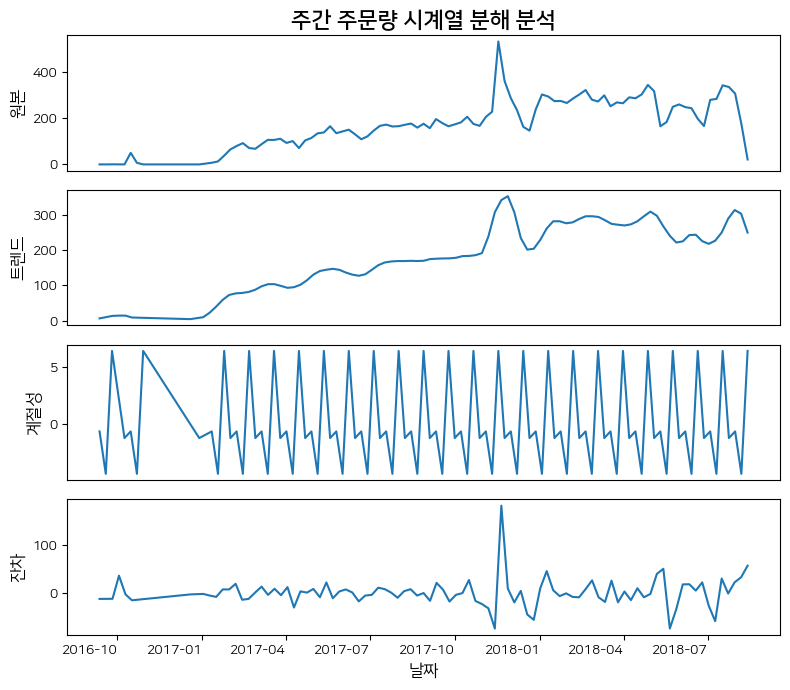

In [ ]:
### 주간 주문량 시계열 분해 분석
week_order_cnt_decomposition = week_order_cnt.set_index('order_purchase_week')

# 시계열 분해
decomposition = seasonal_decompose(week_order_cnt_decomposition['order_cnt'], model='additive', period=4)

## 결과 출력
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize= (8, 7))
plt.rc('font', family='NanumSquare') # 한글 폰트 지정

# 1. 원본 데이터
decomposition.observed.plot(ax=ax1, legend=False)
ax1.set_ylabel('원본', fontsize=12)
ax1.set_title('주간 주문량 시계열 분해 분석', fontsize=16, fontweight='bold')
ax1.set_xlabel('') # x축 레이블 제거
ax1.set_xticks([])

# 2. 트렌드
decomposition.trend.plot(ax=ax2, legend=False)
ax2.set_ylabel('트렌드', fontsize=12)
ax2.set_xlabel('')
ax2.set_xticks([])

# 3. 계절성
decomposition.seasonal.plot(ax=ax3, legend=False)
ax3.set_ylabel('계절성', fontsize=12)
ax3.set_xlabel('')
ax3.set_xticks([])

# 4. 잔차
decomposition.resid.plot(ax=ax4, legend=False)
ax4.set_ylabel('잔차', fontsize=12)
ax4.set_xlabel('날짜', fontsize=12)
ax4.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

**시계열 분해 분석 결과**
1. 트렌드
  - 주문량 트렌드는 전체적으로 상승세를 보임. 특히 2017년 하반기부터 2018년 초반까지의 상승폭이 큼.
  - 상승률은 점진적으로 증가하며, 2017년 연말 시즌 이후에 급격한 상승이 있음. 하지만 2018년 중반 이후로는 상승폭이 줄어들고 안정화되는 모습이 나타남.
  - 여름에는 주문량이 다소 감소하는 경향이 보이는데, 이는 여름 휴가 시즌의 영향일 수 있음.
2. 계절성
  - 계절성은 매월마다 주문 패턴이 반복되는 패턴을 보여주는 것으로 확인됨.

3. 잔차
  - 2017년 연말을 기점으로 주문량에서 큰 폭의 변화가 나타남. 이는 연말 시즌을 맞이하여 프로모션 등을 진행한 결과일 것으로 추측됨.
  - 프로모션 시즌 이전 2~3주 기간 동안 주문량이 감소하다가 프로모션기간 동안 주문량이 큰 폭으로 상승함. 이 후 약 한달간 다시 주문량이 감소하는 모습을 보임.
  - 2018년 여름 시즘에도 큰 폭의 변동성을 보이는데 이는 여름 휴가 등을 맞이한 프로모션 진행 결과일 수 있음.

In [ ]:
## 월간 주문량 추이 테이블
monthly_order_cnt

,order_purchase_month,order_id
0,2016-09-01,7
1,2016-10-01,401
2,2016-12-01,1
3,2017-01-01,1035
4,2017-02-01,2123
5,2017-03-01,3243
6,2017-04-01,2878
7,2017-05-01,4485
8,2017-06-01,3853
9,2017-07-01,4949


<ipython-input-8-205e6a021f36>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


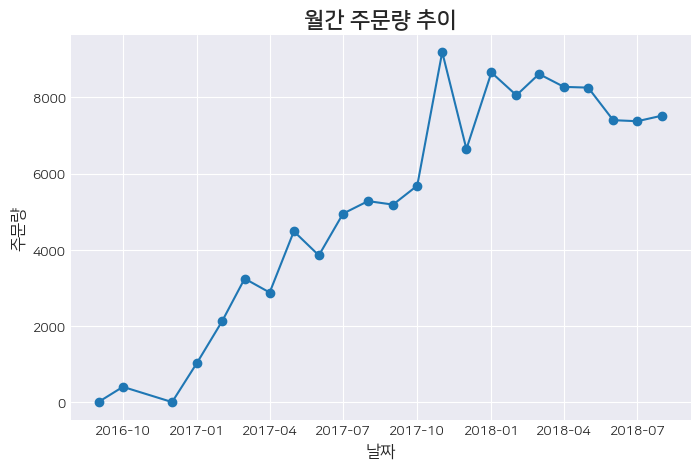

In [ ]:
## 월간 주문량 추이 시각화

# 스타일
plt.style.use('seaborn-darkgrid')
plt.rc('font', family='NanumSquare') # 한글 폰트 지정

# 그래프 크기
plt.figure(figsize=(8, 5))

plt.plot(monthly_order_cnt['order_purchase_month'], monthly_order_cnt['order_id'], linestyle='-', marker='o')


# 제목 및 레이블, 범례 등 지정
plt.title('월간 주문량 추이', fontsize=16, fontweight='bold')
plt.xlabel('날짜', fontdict={'size':12})
plt.ylabel('주문량', fontdict={'size':12})

## 표시할 날짜 범위 설정
# 3개월 간격으로 표시할 레이블 생성
xticks_labels = pd.date_range(start='2016-10', end='2018-09', freq='3M').strftime('%Y-%m')
# x축 레이블 설정: 3개월 간격으로
plt.xticks(ticks=pd.to_datetime(xticks_labels), labels=xticks_labels)

plt.show()

**위 그래프로 알 수 있는 정보**
- 2016년에는 거래량이 거의 없다. 2017년 부터 거래량이 증가하기 시작함.
- 2018년 3분기 까지 꾸준히 성장 추세를 그림. 하지만 그 이후에는 거래량이 급감하는데 이는 이 당시 거래 자체가 데이터 상에 반영되지 않았을 오류의 가능성도 있음.
- 2017년 4분기 즈음에 거래량이 폭증하는 기간이 있었던 것으로 추정됨. 이는 당시 프로모션과 관련이 되어있을 것으로 추정. 어떤 제품이 프로모션의 대상이 되었는지, 이로인한 다른 제품의 영향은 없는지도 확인해 보면 좋을 것 같음.
- 2017년 하반기 프로모션 이후 2018년 부터 거래량이 이전에 비해 일정 부분 상승했음을 알 수 있음.
- 하지만, 2018년 2분기에 거래량이 큰 폭으로 감소하는 기간이 있음.

### 1.2) 매출 추세 분석

In [ ]:
# 주문 시간 타임 스탬프 -> 주문 월로 변환
copy_full_df['order_purchase_month'] = copy_full_df['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()

# 전체 주문액 (제품 가격 & 운송비) 합계 산출
monthly_revenue = copy_full_df.groupby('order_purchase_month', as_index=False)[['price', 'freight_value']].sum()
monthly_revenue['revenue_sum'] = monthly_revenue['price'] + monthly_revenue['freight_value']

In [ ]:
## 월간 매출액 추이 테이블
monthly_revenue

,order_purchase_month,price,freight_value,revenue_sum
0,2016-09-01,267.36,87.39,354.75
1,2016-10-01,51068.92,7661.93,58730.85
2,2016-12-01,10.90,8.72,19.62
3,2017-01-01,129895.32,18134.79,148030.11
4,2017-02-01,262013.86,41634.45,303648.31
5,2017-03-01,398117.44,61661.20,459778.64
6,2017-04-01,392595.36,57112.45,449707.81
7,2017-05-01,549226.84,85535.38,634762.22
8,2017-06-01,456867.47,74184.59,531052.06
9,2017-07-01,536906.96,94434.61,631341.57


<ipython-input-11-405f959823be>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


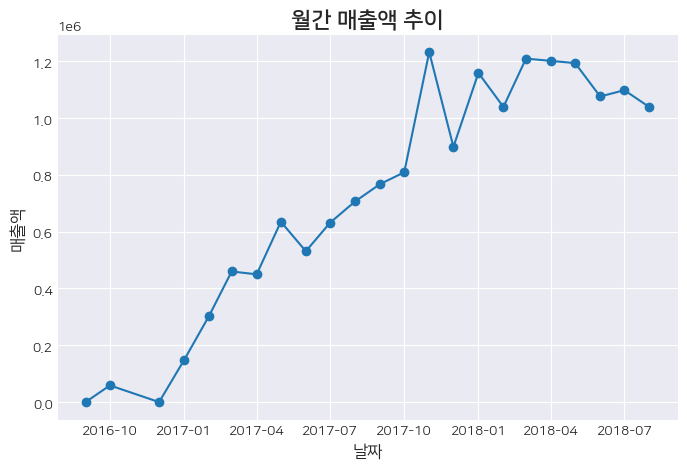

In [ ]:
## 월간 매출액 추이 시각화

# 스타일
plt.style.use('seaborn-darkgrid')
plt.rc('font', family='NanumSquare') # 한글 폰트 지정

# 그래프 크기
plt.figure(figsize=(8, 5))

plt.plot(monthly_revenue['order_purchase_month'], monthly_revenue['revenue_sum'], linestyle='-', marker='o')


# 제목 및 레이블, 범례 등 지정
plt.title('월간 매출액 추이', fontsize=16, fontweight='bold')
plt.xlabel('날짜', fontdict={'size':12})
plt.ylabel('매출액', fontdict={'size':12})

## 표시할 날짜 범위 설정
# 3개월 간격으로 표시할 레이블 생성
xticks_labels = pd.date_range(start='2016-10', end='2018-09', freq='3M').strftime('%Y-%m')
# x축 레이블 설정: 3개월 간격으로
plt.xticks(ticks=pd.to_datetime(xticks_labels), labels=xticks_labels)

plt.show()

### 1.3) 월간 활성 고객수 추이 확인

활성 고객의 정의는 각 단위기간별 구매 이력이 있는 고객으로 판단하였음.

In [ ]:
# 월별 구매 이력이 있는 Customer ID의 개수
copy_full_df['order_purchase_month'] = copy_full_df['order_purchase_timestamp'].dt.to_period('M')\
  .dt.to_timestamp()
month_customer_cnt = copy_full_df.groupby('order_purchase_month', as_index=False)['customer_id'].nunique()

In [ ]:
month_customer_cnt

,order_purchase_month,customer_id
0,2016-09-01,4
1,2016-10-01,324
2,2016-12-01,1
3,2017-01-01,800
4,2017-02-01,1780
5,2017-03-01,2682
6,2017-04-01,2404
7,2017-05-01,3700
8,2017-06-01,3245
9,2017-07-01,4026


<ipython-input-20-2795b150c3de>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


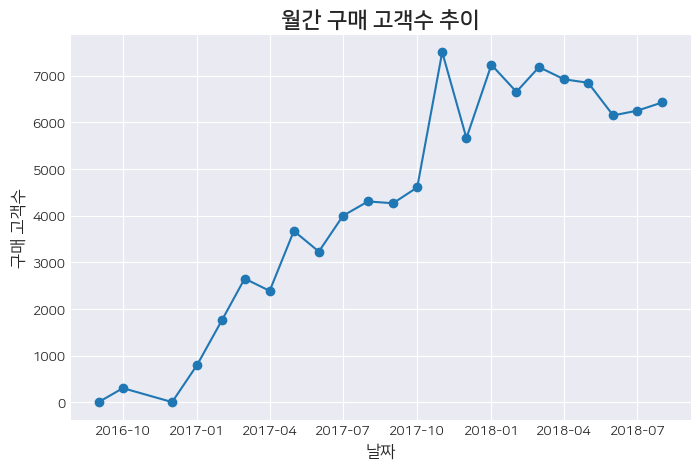

In [ ]:
## 월간 활성 고객수 추이 시각화

# 스타일
plt.style.use('seaborn-darkgrid')
plt.rc('font', family='NanumSquare') # 한글 폰트 지정

# 그래프 크기
plt.figure(figsize=(8, 5))

plt.plot(month_customer_cnt['order_purchase_month'], month_customer_cnt['customer_id'], linestyle='-', marker='o')


# 제목 및 레이블, 범례 등 지정
plt.title('월간 구매 고객수 추이', fontsize=16, fontweight='bold')
plt.xlabel('날짜', fontdict={'size':12})
plt.ylabel('구매 고객수', fontdict={'size':12})

# 표시할 날짜 범위 설정
xticks_labels = pd.date_range(start='2016-10', end='2018-10', freq='3M').strftime('%Y-%m')
plt.xticks(ticks=pd.to_datetime(xticks_labels), labels=xticks_labels)

plt.show()

**위 그래프로 알 수 있는 정보**
- 주문량 추이와 비슷한 추이를 나타냄
- 2017년에는 꾸준히 월간 이용자가 꾸준히 증가함
- 2017년 4분기 프로모션(?)의 영향으로 이용자 수가 급증 했으며 이러한 영향으로 2018년의 이용자 수는 높게 유지됨
- 2018년의 활성 고객 수는 2017년에 비해 큰 폭으로 증가하였으나 성장세는 둔화 됨

### 1.4) 코호트별 유지율 분석

In [ ]:
## 코호트 집계
# 최초 거래 시점(월) 추출
copy_full_df['order_purchase_month'] = copy_full_df['order_purchase_timestamp'].dt.to_period('M')\
  .dt.to_timestamp()

copy_full_df['CohortMonth'] = copy_full_df.groupby('customer_unique_id', as_index=False)['order_purchase_month'].transform('min')

# 최초 거래 시점(월)로부터 경과 기간 산출
def get_date_int(df, col):
  year = df[col].dt.year
  month = df[col].dt.month
  day = df[col].dt.day
  return year, month, day

purchase_year, purchase_month, _ = get_date_int(copy_full_df, 'order_purchase_month')
cohorth_year, cohort_month, _ = get_date_int(copy_full_df, 'CohortMonth')

year_diff = purchase_year - cohorth_year
month_diff = purchase_month - cohort_month

copy_full_df['CohortIndex'] = year_diff * 12 + month_diff + 1

# 각각의 코호트로부터 월별 활성 유저 카운트 산출
cohort_data = copy_full_df.groupby(['CohortMonth', 'CohortIndex'], as_index=False)['customer_unique_id'].apply(pd.Series.nunique)

cohort_data = cohort_data[cohort_data['CohortMonth'] >= pd.Timestamp('2017-01-01')] # 2017년 1월 이전의 데이터는 제거

cohort_counts = cohort_data.pivot_table(index='CohortMonth', columns='CohortIndex', values='customer_unique_id')

In [ ]:
## 코호트별 고객 유지율(retention) 계산
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size, axis=0)
retention = retention.round(4)

retention.index = retention.index.strftime('%Y-%m') # 년-월로 변환

Text(146.72222222222223, 0.5, '코호트\n(첫 구매시점 기준)')

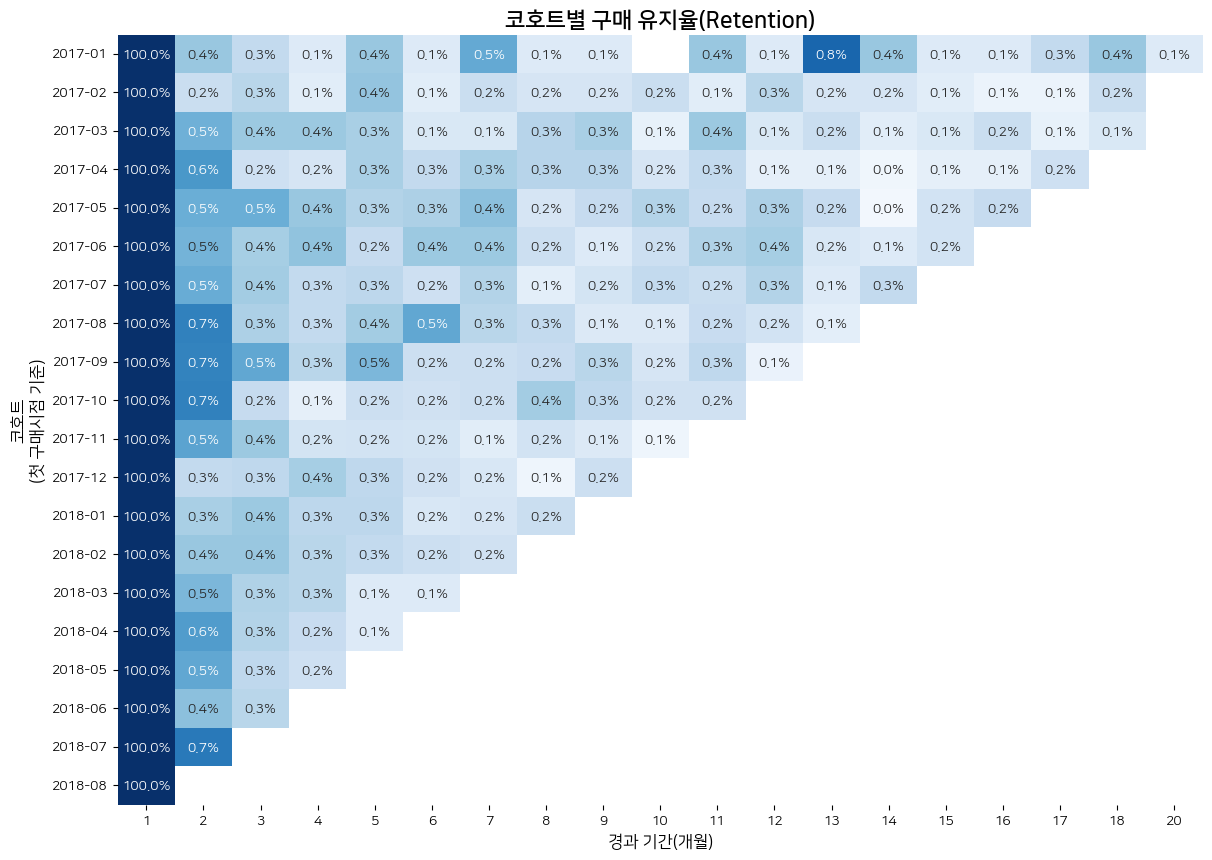

In [ ]:
## 히트맵으로 시각화
plt.figure(figsize=(14, 10))
plt.rc('font', family='NanumSquare') # 한글 폰트 지정
sns.heatmap(retention, annot=True, fmt='.1%', cmap='Blues', vmin=0.0, vmax=0.01, cbar=False)

plt.title('코호트별 구매 유지율(Retention)', fontsize=16, fontweight='bold')
plt.xlabel('경과 기간(개월)', fontsize=12)
plt.ylabel('코호트\n(첫 구매시점 기준)', fontsize=12)


**분석 결과 및 인사이트**
1. 전체적인 구매 유지율 감소
  - 모든 코호트에서 첫 구매 이후 시간이 지남에 따라 고객 유지율이 급격히 감소하는 패턴이 보임. 첫 구매 이후 2개월 차 부터 구매율은 1% 미만으로 감소함.
  - 이는 대부분의 고객이 첫 구매 이후 재구매를 하지 않거나, 구매 주기가 길어지면서 활성 고객 수가 크게 감소하는 것을 의미
2. 코호트 간 유지율 차이
  - 초기 유지율이 코호트마다 다소 차이가 있음. 예를 들어, 2017년 1월 코호트의 2개월 차 유지율은 약 0.0039로 다른 코호트보다 상대적으로 낮음. 반면, 2017년 9월 코호트는 2개월 차 유지율이 0.0053으로 다른 시점의 코호트보다 높게 나타남.
  - 이러한 차이는 해당 월에 판매된 특정 제품이나 마케팅 활동이 코호트 유지율에 영향을 미쳤을 가능성을 시사.
3. 재구매 유도 전략 필요성
  - 코호트의 유지율이 첫 구매 후 급격히 감소하는 점을 고려할 때, 고객의 재구매를 유도하는 마케팅 전략이 필요할 것으로 보임. 예를 들어, 첫 구매 후 1~2개월 내에 재구매를 유도할 수 있는 할인 쿠폰, 맞춤형 추천, 이메일 마케팅 등을 고려할 수 있음.
4. 장기 충성 고객 분석
  - 12개월 이상 재구매를 유지하는 고객들은 매우 소수지만, 충성도 높은 고객으로 볼 수 있음. 이들을 대상으로 VIP 프로그램이나 특별 혜택을 제공하여 장기적인 관계를 유지하는 전략을 마련하는 것이 중요할 것으로 보임.
5. 구매 주기 관리
  - 대부분의 코호트에서 1~3개월 이내에 유지율이 급격히 감소하는 것을 고려할 때, 고객의 구매 주기를 관리하는 것이 중요. 제품 사용 주기에 맞춘 리마인더 이메일이나 맞춤형 상품 추천 시스템을 통해 고객이 자연스럽게 재구매할 수 있는 환경을 구축하는 것이 필요할 것으로 보임.

### 1.5) 요일별, 시간대별 주문 분석

<ipython-input-19-5947c451cf87>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders_weekday_hour = copy_full_df.groupby(['order_purchase_weekday', 'order_purchase_hour'], as_index=False)['order_id'].count()


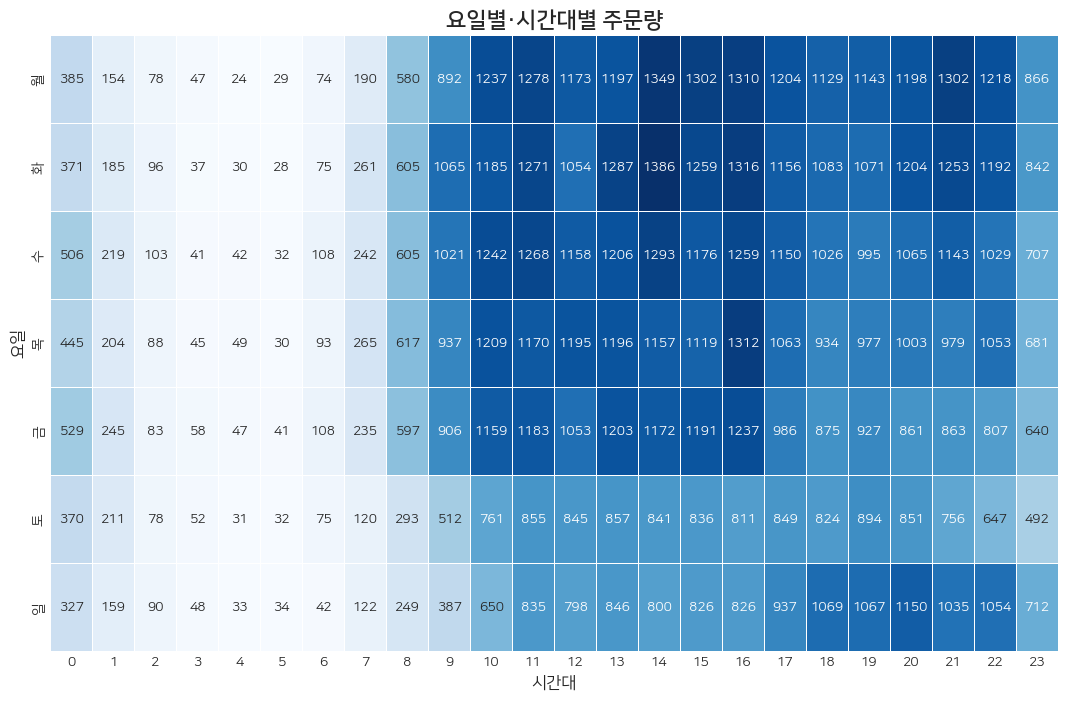

In [ ]:
# 구매 시점 기준 요일 정보, 시간 정보 추출
copy_full_df['order_purchase_weekday'] = copy_full_df['order_purchase_timestamp'].dt.day_name()
copy_full_df['order_purchase_hour'] = copy_full_df['order_purchase_timestamp'].dt.hour

copy_full_df['order_purchase_weekday'] = copy_full_df['order_purchase_weekday'].map({
    'Monday':'월',
    'Tuesday':'화',
    'Wednesday':'수',
    'Thursday':'목',
    'Friday':'금',
    'Saturday':'토',
    'Sunday':'일'
})

# 요일 순서 조정
weekday_order = ['월', '화', '수', '목', '금', '토', '일']
copy_full_df['order_purchase_weekday'] = pd.Categorical(copy_full_df['order_purchase_weekday'], categories=weekday_order, ordered=True)
copy_full_df['order_purchase_weekday']

# 요일별, 시간별 주문수 집계
orders_weekday_hour = copy_full_df.groupby(['order_purchase_weekday', 'order_purchase_hour'], as_index=False)['order_id'].count()
orders_weekday_hour_pivot = orders_weekday_hour.pivot(index='order_purchase_weekday', columns='order_purchase_hour', values='order_id')

# 히트맵 시각화
plt.figure(figsize=(13, 8))
sns.heatmap(orders_weekday_hour_pivot, annot=True, fmt=".0f", cmap='Blues', linewidths=0.5, cbar=False)

# 그래프 제목 및 레이블 설정
plt.title('요일별·시간대별 주문량', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('시간대', fontdict={'size':12})
plt.ylabel('요일', fontdict={'size':12})

plt.show()

In [ ]:
orders_weekday_hour_pivot

order_purchase_hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
order_purchase_weekday,,,,,,,,,,,,,,,,,,,,,,,,
월,385,154,78,47,24,29,74,190,580,892,1237,1278,1173,1197,1349,1302,1310,1204,1129,1143,1198,1302,1218,866
화,371,185,96,37,30,28,75,261,605,1065,1185,1271,1054,1287,1386,1259,1316,1156,1083,1071,1204,1253,1192,842
수,506,219,103,41,42,32,108,242,605,1021,1242,1268,1158,1206,1293,1176,1259,1150,1026,995,1065,1143,1029,707
목,445,204,88,45,49,30,93,265,617,937,1209,1170,1195,1196,1157,1119,1312,1063,934,977,1003,979,1053,681
금,529,245,83,58,47,41,108,235,597,906,1159,1183,1053,1203,1172,1191,1237,986,875,927,861,863,807,640
토,370,211,78,52,31,32,75,120,293,512,761,855,845,857,841,836,811,849,824,894,851,756,647,492
일,327,159,90,48,33,34,42,122,249,387,650,835,798,846,800,826,826,937,1069,1067,1150,1035,1054,712


## 2) 제품 분석

### 2.1) 제품 카테고리별 매출액 분석

In [ ]:
copy_full_df['order_purchase_month'] = copy_full_df['order_purchase_timestamp'].dt.to_period('M')\
  .dt.to_timestamp()

# 카테고리별 매출액 집계
category_revenue = copy_full_df.groupby('product_category_name_english', as_index=False).agg(
    total_revenue = ('price', 'sum')
)

# 매출액 상위 20개 카테고리
top20_categories = category_revenue.nlargest(20, 'total_revenue')

# 기타 카테고리
other_category_revenue = category_revenue[~category_revenue['product_category_name_english'].isin(top20_categories['product_category_name_english'])]['total_revenue'].sum()
other_category = pd.DataFrame({'product_category_name_english':['기타'], 'total_revenue':[other_category_revenue]})

# 전체 카테고리
all_categories = pd.concat([top20_categories, other_category], ignore_index=True)


# 매출액 비율 계산
all_categories['revenue_percent'] = (all_categories['total_revenue'] / all_categories['total_revenue'].sum()) * 100

# 크기 순 정렬
all_categories = all_categories.sort_values(by='total_revenue', ascending=False).reset_index(drop=True)

# 카테고리 이름 한국어로 조정
all_categories['product_category_name_english'] = all_categories['product_category_name_english'].map(
    {'health_beauty':'미용·건강',
     'watches_gifts':'시계',
     'bed_bath_table':'침구·욕실',
     'sports_leisure':'레져',
     'computers_accessories':'컴퓨터 악세서리',
     'furniture_decor':'가구 데코',
     'housewares':'가정용품',
     'cool_stuff':'스마트 기기',
     'auto':'자동차 용품',
     'garden_tools':'정원 용품',
     'toys':'장난감',
     'baby':'육아',
     'perfumery':'향수',
     'telephony':'통신기기',
     'office_furniture':'사무용 가구',
     'computers':'컴퓨터 기기',
     'stationery':'사무용품',
     'pet_shop':'반려동물 용품',
     'musical_instruments':'악기 등',
     'small_appliances':'소형가전'}
).fillna(all_categories['product_category_name_english'])

In [ ]:
all_categories

,product_category_name_english,total_revenue,revenue_percent
0,기타,2093183.92,14.870541
1,미용·건강,1301947.97,9.249388
2,시계,1254322.95,8.911048
3,침구·욕실,1107249.09,7.866195
4,레져,1029603.88,7.314583
5,컴퓨터 악세서리,950053.69,6.749437
6,가구 데코,772096.17,5.485179
7,가정용품,668880.94,4.751910
8,스마트 기기,664637.13,4.721761
9,자동차 용품,618395.50,4.393248


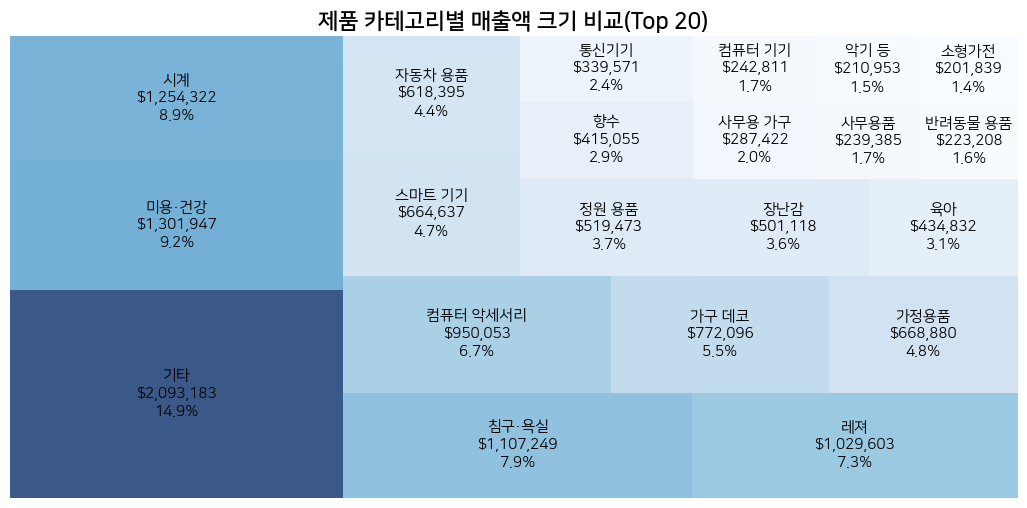

In [ ]:
### 제품 카테고리별 매출액 시각화

# 색상 설정
norm = plt.Normalize(all_categories['total_revenue'].min(), all_categories['total_revenue'].max())
cmap = plt.get_cmap('Blues')
colors = cmap(norm(all_categories['total_revenue']))

# 트리맵 생성
plt.figure(figsize=(13, 6))
ax = squarify.plot(
    sizes=all_categories['total_revenue'],
    label=[f"{cat}\n${int(sales):,}\n{perc:.1f}%" for cat, sales, perc in zip(all_categories['product_category_name_english'], all_categories['total_revenue'], all_categories['revenue_percent'])],
    color=colors,
    alpha=0.8
)

# 카테고리 이름 폰트 설정
for label in ax.texts:
    label.set_fontsize(11)
    label.set_fontname('NanumSquare')

# 레이아웃 조정
plt.axis('off')  # 축 제거
plt.title('제품 카테고리별 매출액 크기 비교(Top 20)', fontsize=16, fontweight='bold')

plt.show()

### 2.2) 인기 제품 분석

In [ ]:
# 제품명을 앞자리 8자리만 추출
copy_full_df['product_id_short'] = copy_full_df['product_id'].str[:8]

In [ ]:
## 판매량 기준 인기 제품 분석
sales_by_product = copy_full_df.groupby(['product_id_short', 'product_category_name_english'], as_index=False)['order_item_id'].count()
sales_by_product.columns = ['제품ID', '카테고리', '판매량']

# 상위 10개 제품
top_products_by_sales = sales_by_product.sort_values('판매량', ascending=False).head(10)

# 카테고리 이름 한국어로 조정
top_products_by_sales['카테고리_kor'] = top_products_by_sales['카테고리'].map(
    {'furniture_decor':'가구 데코',
     'bed_bath_table':'침구·욕실',
     'garden_tools':'정원 용품',
     'computers_accessories':'컴퓨터 악세서리',
     'watches_gifts':'시계 등',
     'health_beauty':'미용·건강'}
).fillna(top_products_by_sales['카테고리'])


# 제품ID와 카테고리 결합
top_products_by_sales['제품ID_2'] = top_products_by_sales['제품ID'] + '\n(' + top_products_by_sales['카테고리_kor'] + ')'

In [ ]:
top_products_by_sales

,제품ID,카테고리,판매량,카테고리_kor,제품ID_2
21716,aca2eb7d,furniture_decor,536,가구 데코,aca2eb7d\n(가구 데코)
19387,99a4788c,bed_bath_table,528,침구·욕실,99a4788c\n(침구·욕실)
8453,422879e1,garden_tools,508,정원 용품,422879e1\n(정원 용품)
7228,389d119b,garden_tools,406,정원 용품,389d119b\n(정원 용품)
6947,368c6c73,garden_tools,398,정원 용품,368c6c73\n(정원 용품)
10635,53759a2e,garden_tools,391,정원 용품,53759a2e\n(정원 용품)
26533,d1c42706,computers_accessories,357,컴퓨터 악세서리,d1c42706\n(컴퓨터 악세서리)
10662,53b36df6,watches_gifts,327,시계 등,53b36df6\n(시계 등)
2741,154e7e31,health_beauty,295,미용·건강,154e7e31\n(미용·건강)
7902,3dd2a171,computers_accessories,278,컴퓨터 악세서리,3dd2a171\n(컴퓨터 악세서리)


<ipython-input-18-365375a2df44>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='판매량', y='제품ID_2', data=top_products_by_sales, palette='viridis')


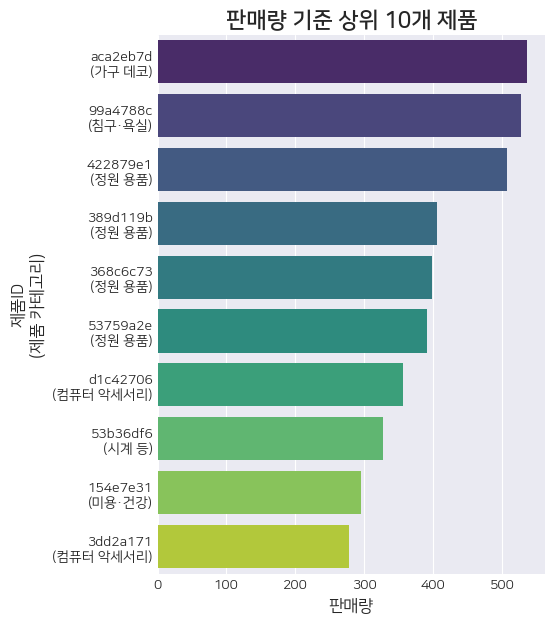

In [ ]:
## 시각화
plt.figure(figsize=(5, 7))
sns.barplot(x='판매량', y='제품ID_2', data=top_products_by_sales, palette='viridis')
plt.xlabel('판매량', fontsize=12)
plt.ylabel('제품ID\n(제품 카테고리)', fontsize=12)
plt.title('판매량 기준 상위 10개 제품', fontsize=16, fontweight='bold')
plt.show()

In [ ]:
## 매출 기준 인기 제품 분석
revenue_by_product = copy_full_df.groupby(['product_id_short', 'product_category_name_english'], as_index=False)['price'].sum()
revenue_by_product.columns = ['제품ID', '카테고리', '매출액']

# 상위 10개 제품
top_products_by_revenue = revenue_by_product.sort_values('매출액', ascending=False).head(10)

# 카테고리 이름 한국어로 조정
top_products_by_revenue['카테고리_kor'] = top_products_by_revenue['카테고리'].map(
    {'furniture_decor':'가구 데코',
     'bed_bath_table':'침구·욕실',
     'garden_tools':'정원 용품',
     'computers_accessories':'컴퓨터 악세서리',
     'watches_gifts':'시계 등',
     'health_beauty':'미용·건강',
     'computers':'컴퓨터 기기',
     'baby':'육아',
     'cool_stuff':'스마트 기기'}
).fillna(top_products_by_revenue['카테고리'])


# 제품ID와 카테고리 결합
top_products_by_revenue['제품ID_2'] = top_products_by_revenue['제품ID'] + '\n(' + top_products_by_revenue['카테고리_kor'] + ')'

In [ ]:
top_products_by_revenue

,제품ID,카테고리,매출액,카테고리_kor,제품ID_2
23641,bb50f2e2,health_beauty,68810.00,미용·건강,bb50f2e2\n(미용·건강)
27102,d6160fb7,computers,56948.83,컴퓨터 기기,d6160fb7\n(컴퓨터 기기)
13808,6cdd5384,health_beauty,55779.90,미용·건강,6cdd5384\n(미용·건강)
26533,d1c42706,computers_accessories,49141.40,컴퓨터 악세서리,d1c42706\n(컴퓨터 악세서리)
19387,99a4788c,bed_bath_table,46575.66,침구·욕실,99a4788c\n(침구·욕실)
4901,25c38557,baby,44829.32,육아,25c38557\n(육아)
7902,3dd2a171,computers_accessories,41682.20,컴퓨터 악세서리,3dd2a171\n(컴퓨터 악세서리)
21716,aca2eb7d,furniture_decor,38248.20,가구 데코,aca2eb7d\n(가구 데코)
10662,53b36df6,watches_gifts,38158.21,시계 등,53b36df6\n(시계 등)
12125,5f504b3a,cool_stuff,37733.90,스마트 기기,5f504b3a\n(스마트 기기)


<ipython-input-17-be73ca94e48b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='매출액', y='제품ID_2', data=top_products_by_revenue, palette='viridis')


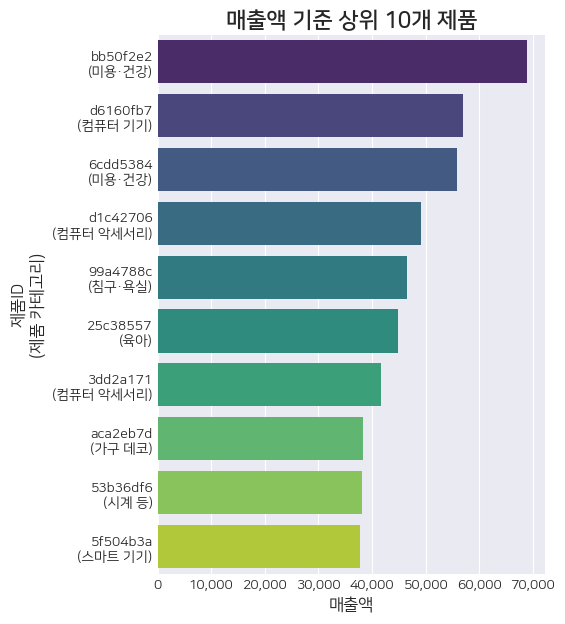

In [ ]:
## 시각화
plt.figure(figsize=(5, 7))
sns.barplot(x='매출액', y='제품ID_2', data=top_products_by_revenue, palette='viridis')
plt.xlabel('매출액', fontsize=12)
plt.ylabel('제품ID\n(제품 카테고리)', fontsize=12)
plt.title('매출액 기준 상위 10개 제품', fontsize=16, fontweight='bold')

# x축 값에 쉼표 추가 포맷 설정
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

In [ ]:
# 리뷰 점수 기준 인기 제품 분석
reviews_by_product = copy_full_df.groupby('product_id_short', as_index=False)['review_score'].mean()
reviews_by_product.columns = ['제품ID', '평균 리뷰 점수']

# 판매량과 평균 리뷰 점수 결합
product_summary = pd.merge(sales_by_product, reviews_by_product, on='제품ID')

# 리뷰 개수 10개 미만인 제품은 분석 대상에서 제외
product_summary = product_summary[product_summary['판매량'] >=10]

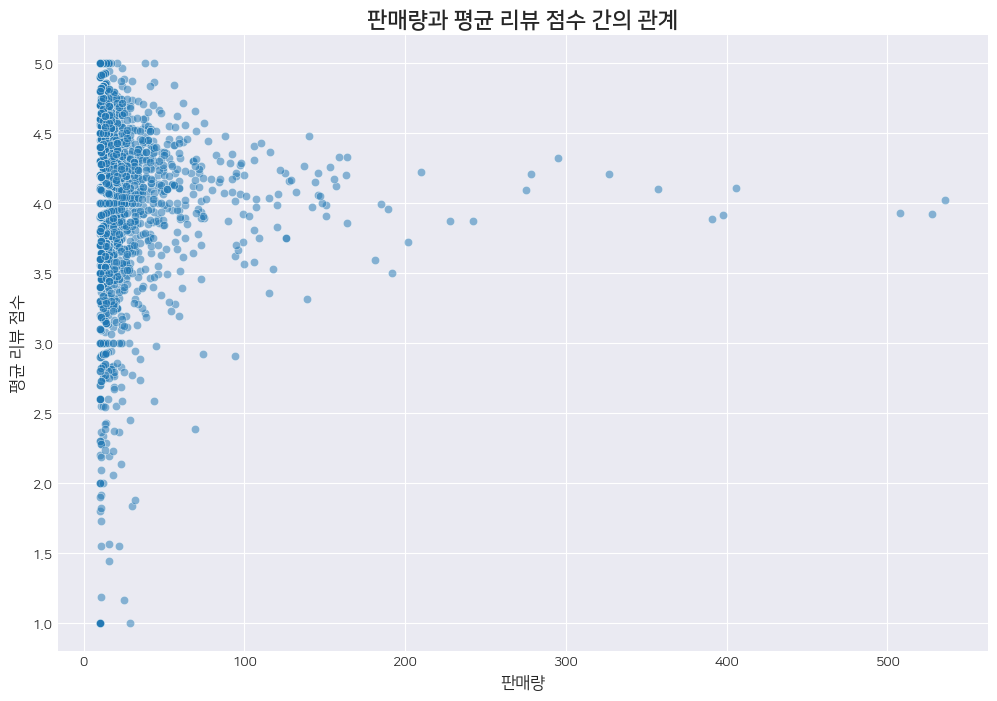

In [ ]:
# 리뷰 점수와 판매량 결합 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(x='판매량', y='평균 리뷰 점수', data=product_summary, alpha=0.5)
plt.xlabel('판매량', fontsize=12)
plt.ylabel('평균 리뷰 점수', fontsize=12)
plt.title('판매량과 평균 리뷰 점수 간의 관계', fontsize=16, fontweight='bold')
plt.show()

### 2.3) 제품 가격 분석

In [ ]:
# 카테고리별 판매량 집계
category_sales = copy_full_df.groupby('product_category_name_english', as_index=False).agg(
    total_sales = ('order_id', 'count')
)

# 매출액 상위 10개 카테고리
top10_categories = category_sales.nlargest(10, 'total_sales')

In [ ]:
# 가격대 구간 설정
price_bins = [0, 25, 50, 75, 100, 150, 300, float('inf')]
price_bin_labels = ['0-25', '25-50', '50-75', '75-100','100-150', '150-300', '300-']
copy_full_df['price_bin'] = pd.cut(copy_full_df['price'], bins=price_bins, labels=price_bin_labels, right=False)

# 상위 20개 카테고리에 대해서만 집계
top10_df = copy_full_df[copy_full_df['product_category_name_english'].isin(top10_categories['product_category_name_english'])]

# 가격대별 판매량 집계
sales_by_category_price = top10_df.groupby(['product_category_name_english', 'price_bin'])['order_id'].count().reset_index()
sales_by_category_price.rename(columns={'order_id': 'total_sales'}, inplace=True)

# 각 카테고리별로 정규화된 판매량을 저장하기 위한 컬럼 추가
sales_by_category_price['normalized_sales'] = 0

# 카테고리별로 판매량 정규화 수행(시각화 목적)
scaler = MinMaxScaler()
categories = sales_by_category_price['product_category_name_english'].unique()

for category in categories:
    # 해당 카테고리의 데이터만 추출
    category_data = sales_by_category_price[sales_by_category_price['product_category_name_english'] == category]

    # total_sales를 2차원 배열로 변환 후 정규화 적용
    sales_by_category_price.loc[sales_by_category_price['product_category_name_english'] == category, 'normalized_sales'] = scaler.fit_transform(category_data[['total_sales']])

# 카테고리명 한국어로 조정
sales_by_category_price['카테고리_kor'] = sales_by_category_price['product_category_name_english'].map(
    {'furniture_decor':'가구 데코',
     'bed_bath_table':'침구·욕실',
     'garden_tools':'정원 용품',
     'computers_accessories':'컴퓨터 악세서리',
     'watches_gifts':'시계 등',
     'health_beauty':'미용·건강',
     'auto':'자동차 용품',
     'housewares':'가정용품',
     'sports_leisure':'레져',
     'telephony':'통신관련'}
).fillna(sales_by_category_price['product_category_name_english'])

<ipython-input-26-cb93a00396b1>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_category_price = top10_df.groupby(['product_category_name_english', 'price_bin'])['order_id'].count().reset_index()
<ipython-input-26-cb93a00396b1>:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.37878788 1.         0.53896104 0.05627706 0.84199134 0.70779221
 0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sales_by_category_price.loc[sales_by_category_price['product_category_name_english'] == category, 'normalized_sales'] = scaler.fit_transform(category_data[['total_sales']])


In [ ]:
heatmap_data_actual

price_bin,0-25,25-50,50-75,75-100,100-150,150-300,300-
카테고리_kor,,,,,,,
가구 데코,858,2627,1839,1386,897,1093,132
가정용품,1227,2041,1214,908,940,810,240
레져,881,1987,1593,1060,1777,1317,389
미용·건강,1238,1928,1653,1549,1488,1063,1113
시계 등,70,1065,566,635,1288,1695,894
자동차 용품,571,858,645,422,785,723,396
정원 용품,257,1164,1493,573,422,389,292
침구·욕실,1011,2480,2348,2551,2036,1428,134
컴퓨터 악세서리,865,1766,1070,1365,1599,1167,318


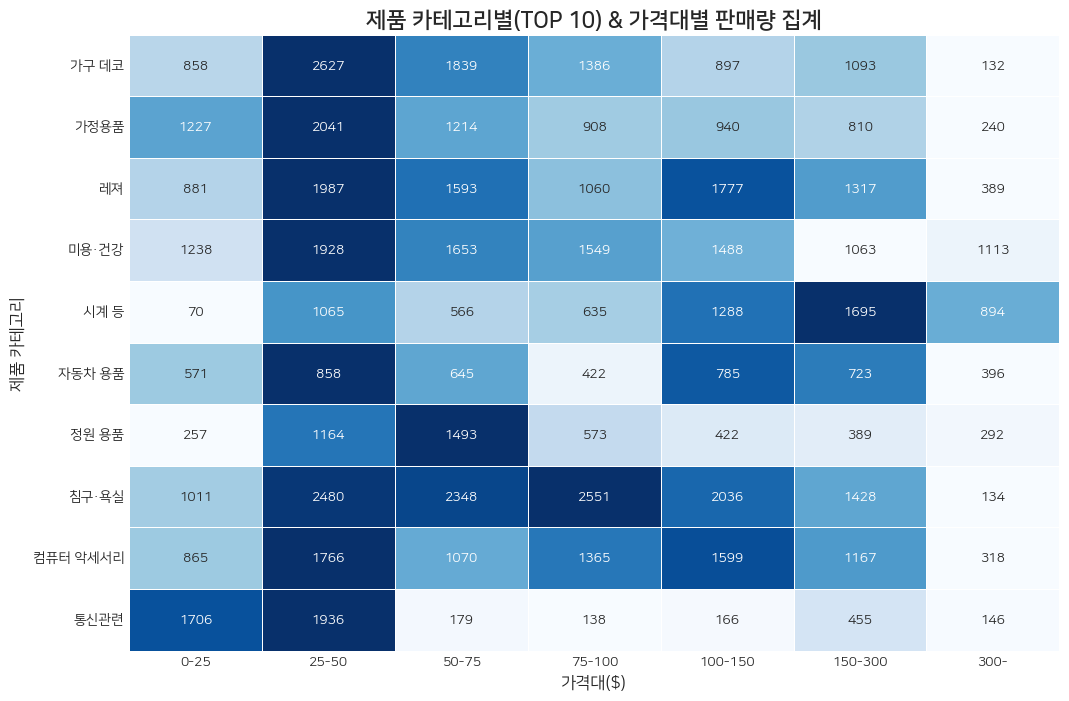

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 데이터프레임 재구성 (피벗) - 히트맵을 그리기 위해 필요
heatmap_data_normalized = sales_by_category_price.pivot(index="카테고리_kor", columns="price_bin", values="normalized_sales")
heatmap_data_actual = sales_by_category_price.pivot(index="카테고리_kor", columns="price_bin", values="total_sales")

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_normalized, annot=heatmap_data_actual, fmt=".0f", cmap="Blues", linewidths=0.5, cbar=False)

# 그래프 제목 및 레이블 설정
plt.title('제품 카테고리별(TOP 10) & 가격대별 판매량 집계', fontsize=16, fontweight='bold')
plt.xlabel('가격대($)', fontsize=12)
plt.ylabel('제품 카테고리', fontsize=12)

plt.show()

## 3) 고객 세분화 및 행동분석

### 3.1) RFM 분석

RFM 분석은 고객을 **Recency (최근성)**, **Frequency (빈도)**, **Monetary (금액)** 라는 세 가지 주요 지표로 평가하여 고객 가치를 세분화하는 방법임.
이를 통해 고가치 고객을 식별하고, 맞춤형 마케팅 전략을 수립할 수 있음.

In [ ]:
# 주문일자 Timestamp -> date
copy_full_df['order_purchase_date'] = pd.to_datetime(copy_full_df['order_purchase_timestamp']).dt.date

<ipython-input-7-815fa6997ff2>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


Text(0, 0.5, '빈도')

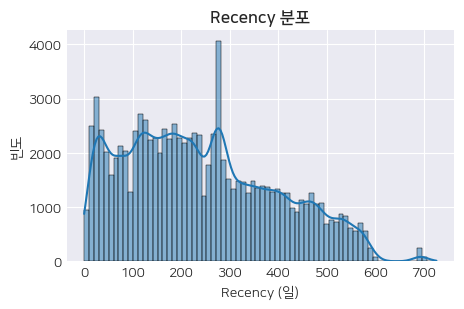

In [ ]:
## Recency 계산

# 분석 기준일 설정: 2018년 8월 31일
reference_date = pd.to_datetime('2018-08-31')

# 최근 구매일 계산
recency_df = copy_full_df.groupby('customer_unique_id', as_index=False).agg({
    'order_purchase_date':lambda x: (reference_date - pd.to_datetime(x.max())).days
})

recency_df.columns = ['customer_unique_id', 'recency']

# Recency 분포 시각화
# 스타일
plt.style.use('seaborn-darkgrid')
plt.rc('font', family='NanumSquare') # 한글 폰트 지정

plt.figure(figsize=(5, 3))
sns.histplot(recency_df['recency'], kde=True)
plt.title('Recency 분포', fontweight='bold')
plt.xlabel('Recency (일)')
plt.ylabel('빈도')

- 약 25% 의 이용자가 3.9개월 이내에 거래 이력이 있으며, 평균 Recency는 약 8개월 정도로 확인됨.

<ipython-input-8-06d3fa5c16a9>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


Text(0, 0.5, '빈도')

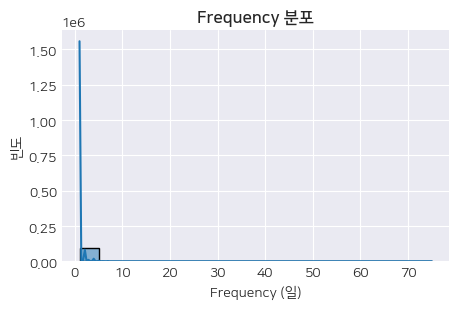

In [ ]:
## Frequency 계산

# 주문 횟수 계산
frequency_df = copy_full_df.groupby('customer_unique_id', as_index=False).agg({
    'order_id': 'size'
})

frequency_df.columns = ['customer_unique_id', 'frequency']

# Frequency 분포 시각화
plt.style.use('seaborn-darkgrid')
plt.rc('font', family='NanumSquare') # 한글 폰트 지정

plt.figure(figsize=(5, 3))
sns.histplot(frequency_df['frequency'], kde=True)
plt.title('Frequency 분포', fontweight='bold')
plt.xlabel('Frequency (일)')
plt.ylabel('빈도')

**전체 이용자 96,090명 중 81,604명이 1회만 구매했고, 10,550명이 2회 구매하는 등 구매 빈도가 그리 많지 않은 현상에 대한 이해**

1. 일회성 구매 고객의 비중이 높음.
  - 이는 고객 유지율이 낮음을 시사함. Olist에서의 경험에 만족하지 못했거나, 서비스에 대한 충성도가 높지 않음을 나타낼 수 있음. 고객이 재구매하도록 유도하는 전략이 필요할 것으로 보임.
  - 이를 위해, 로열티 프로그램, 할인 쿠폰, 리마인더 알림 등 마케팅 활동이 필요함을 시사함.

2. 고객 경험과 서비스 품질 개선의 필요
  - 구매 후 재구매가 이어지지 않는 경우, 고객이 처음 구매 후 느낀 경험이 만족스럽지 않았을 수 있다고 보임. 이에 구매 후 만족도 조사를 시행하여 고객 리뷰와 피드백을 분석해 서비스의 문제점을 식별할 필요가 있다고 보임.
  - 배송, 제품 품질, 고객 서비스 등에 대하여 전반적으로 점검하고 개선하는 것이 필요.

3. 신규 고객 유입은 성공적이나, 고객 유지 실패
  - 고객의 첫 구매를 이끌어내는 마케팅은 성공적이지만, 고객의 충성도와 장기적 관계를 구축하는 데는 부족함이 있을 수 있음.
  - 고객이 첫 구매 이후 브랜드와 지속적인 관계를 유지할 수 있도록 구매 후 고객 관리를 강화할 필요가 있음. 이를 위해 구매 후 고객에게 감사 메세지를 보내거나, 제품 사용법, 관련 제품 추천 등 이메일 마케팅을 활용할 수 있음.


<ipython-input-9-09a71e9b072a>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


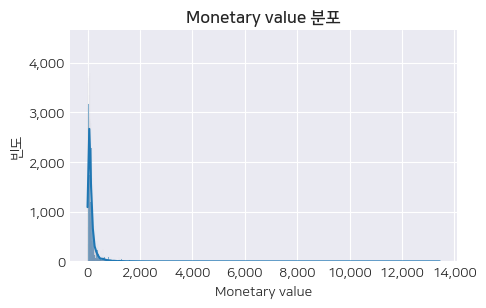

In [ ]:
## Monetary value 계산

# 총 구매액 계산
monetary_df = copy_full_df.groupby('customer_unique_id', as_index=False).agg({
    'price': 'sum'
})

monetary_df.columns = ['customer_unique_id', 'monetary']

# Monetary 분포 시각화
plt.style.use('seaborn-darkgrid')
plt.rc('font', family='NanumSquare') # 한글 폰트 지정

plt.figure(figsize=(5, 3))
sns.histplot(monetary_df['monetary'], kde=True)
plt.title('Monetary value 분포', fontweight='bold')
plt.xlabel('Monetary value')
plt.ylabel('빈도')

# x, y축 값에 쉼표 추가 포맷 설정
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

- 전체 기간 동안 전자상거래를 통해 주문한 금액의 중앙값은 약 \$90, 상위 25%가 약 \$150를 주문, 하위 25%는 약 $46 주문하였음.

In [ ]:
## RFM 데이터 병합
rfm_df = pd.merge(recency_df, frequency_df, on='customer_unique_id')
rfm_df = pd.merge(rfm_df, monetary_df, on='customer_unique_id')

In [ ]:
## RFM 점수화
# Recency가 짧을수록,
# Frequency가 높을수록,
# Monetary value가 높을수록 높은 점수 부여

rfm_df['R_score'] = pd.qcut(rfm_df['recency'], 3, labels=[3, 2, 1]).astype(str)

# F Score의 경우 frequency가 1일 경우 1, 2 이상일 경우 2 부여.
rfm_df['F_score'] = rfm_df['frequency'].apply(lambda x: 2 if x >=2 else 1).astype(str)
rfm_df['M_score'] = pd.qcut(rfm_df['monetary'], 3, labels=[1, 2, 3]).astype(str)


# RFM 점수 결합
rfm_df['RFM_Score'] = rfm_df['R_score'] + rfm_df['F_score'] + rfm_df['M_score']

In [ ]:
# RFM 점수 기반 고객 분류
def rfm_segment(x):
  if x in '323':
    return '핵심 고객'
  elif x in ['311', '213']:
    return '신규 고객'
  elif x in ['111', '112', '113']:
    return '이탈 고객'
  elif ((x[0] in ['2', '3']) and (x[1] in ['2'])) or (x in ['322', '313', '223']):
    return '우수 고객'
  else:
    return '일반 고객'

rfm_df['RFM_segment'] = rfm_df['RFM_Score'].apply(rfm_segment)
rfm_df['RFM_segment'] = pd.Categorical(
    rfm_df['RFM_segment'],
  categories=['핵심 고객', '우수 고객', '신규 고객', '일반 고객', '이탈 고객'],
  ordered=True
)


In [ ]:
# RFM 고객군별 RFM 통계
rfm_result = rfm_df.groupby('RFM_segment').agg(
    Recency_평균 = ('recency', 'mean'),
    Frequency_평균 = ('frequency', 'mean'),
    MonetaryValue_중앙값 = ('monetary', 'median'),
    고객수 = ('customer_unique_id', 'count')
).round({
    'Recency_평균':1,
    'Frequency_평균':1,
    'MonetaryValue_중앙값':1,
    '고객수':0
})
rfm_result.columns = ['Recency\n평균(일)', 'Frequency\n평균(회)', 'MonetaryValue\n중앙값($)', '사이즈']

<ipython-input-24-135990ef2046>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_result = rfm_df.groupby('RFM_segment').agg(


In [ ]:
rfm_normalized

,Recency\n평균,Frequency\n평균,MonetaryValue\n중앙값,사이즈
RFM_segment,,,,
핵심 고객,1.000000,1.000000,1.000000,0
우수 고객,0.862631,0.388889,0.602491,0
신규 고객,0.820722,0.000000,0.000000,0
일반 고객,0.616705,0.111111,0.125065,0
이탈 고객,0.000000,0.000000,0.134925,0


<ipython-input-25-81c56e201af3>:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rfm_others_formatted = rfm_result.drop(columns=['사이즈']).applymap(format_value)


Text(0.5, 1.0, 'RFM 고객군별 통계 결과')

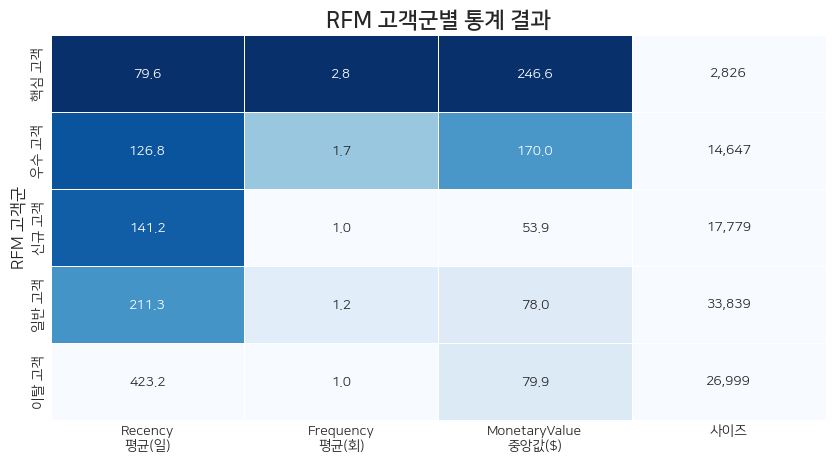

In [ ]:
## RFM 고객군별 통계 결과를 히트맵으로 시각화 하기

# 먼저 정규화 수행
def normalize_rfm(df):
  return(df-df.min())/(df.max()-df.min())

rfm_normalized = rfm_result[['Recency\n평균(일)', 'Frequency\n평균(회)', 'MonetaryValue\n중앙값($)', '사이즈']].apply(normalize_rfm)
rfm_normalized['Recency\n평균(일)'] = 1-rfm_normalized['Recency\n평균(일)']
rfm_normalized['사이즈'] = 0
rfm_annot = rfm_result[['Recency\n평균(일)', 'Frequency\n평균(회)', 'MonetaryValue\n중앙값($)', '사이즈']]

# 천의 자리 구분 기호를 포함한 포맷팅 함수
def format_annot(value):
    return f"{value:,.1f}"

# 각 칼럼에 대한 포맷팅
def format_value(value, is_size=False):
    if is_size:
        return f"{int(value):,.0f}"  # 정수로 표시
    else:
        return f"{value:,.1f}"  # 소수점 첫째자리까지 표시

# 사이즈 포맷팅
rfm_size_formatted = rfm_result['사이즈'].apply(lambda x: format_value(x, is_size=True))

# 나머지 칼럼 포맷팅
rfm_others_formatted = rfm_result.drop(columns=['사이즈']).applymap(format_value)

# 포맷팅된 결과 합치기
rfm_result_formatted = pd.concat([rfm_others_formatted, rfm_size_formatted.rename('사이즈')], axis=1)


# 히트맵 시각화
plt.figure(figsize=(10, 5))
sns.heatmap(
    rfm_normalized,
    annot=rfm_result_formatted,
    fmt="",  # 빈 문자열로 설정하여 annot의 포맷팅을 사용합니다.
    cmap='Blues',
    linewidths=0.5,
    cbar=False
)
plt.ylabel('RFM 고객군', fontsize=12)
plt.title('RFM 고객군별 통계 결과', fontsize=16, fontweight='bold')

**RFM 고객군 특징**

1. 핵심 고객
  - 최근 구매한 지 약 80일 정도이며, 구매 빈도가 상대적으로 높고, 구매 금액도 중간 이상의 금액을 지출하는 고객들임. 이 그룹은 전반적으로 구매 활동이 활발하며, 매출 기여도가 높음. 핵심 고객에 대한 마케팅 전략으로는 로열티 프로그램, 맞춤형 혜택 및 개인화된 서비스 제공이 효과적일 수 있음.

2. 우수 고객
  - 구매 빈도는 핵심 고객보다 낮지만 여전히 중간 수준임. 이 그룹의 고객들은 꽤 높은 금액을 지출하지만, 구매 주기가 다소 길어질 수 있음. 우수 고객을 유지하기 위해서는 정기적인 커뮤니케이션과 특별 할인, 재참여를 유도하는 캠페인이 유용할 수 있음.

3. 신규 고객
  - 이 그룹은 최근에 고객이 된 고객들로, 구매 행동이 초기 단계에 있음. 신규 고객을 유지하고 장기 고객으로 발전시키기 위해서는 환영 프로모션, 추가 구매 유도 캠페인 등을 고려할 수 있음.

4. 일반 고객
  - 이 그룹의 고객들은 구매 주기가 길고, 평균적인 구매 금액도 낮음. 이들을 활성화하기 위해서는 맞춤형 마케팅, 재참여를 유도하는 인센티브 제공, 개인화된 광고가 필요할 수 있음.

5. 이탈 고객
  - 이 그룹은 장기간 동안 구매하지 않은 고객들로, 이탈 했거나, 이탈 가능성이 높은 고객들임. 이탈 고객을 재유치하기 위해서는 할인 쿠폰, 개인 맞춤형 이메일 캠페인, 특별 프로모션을 제공하여 재참여를 유도할 수 있음.

### 3.2) 구매 패턴 분석

#### 3.2.1) 재구매율 분석

In [ ]:
copy_full_df['order_purchase_date'] = copy_full_df['order_purchase_timestamp'].dt.date


# 고객별, 카테고리별 최초 구매 날짜 추출
first_purchase_date = copy_full_df.groupby(['customer_unique_id', 'product_category_name_english'], as_index=False)['order_purchase_date'].min()
first_purchase_date.columns = ['customer_unique_id', 'product_category_name_english', 'first_purchase_date']

# 재구매 여부 확인
copy_full_df = pd.merge(copy_full_df, first_purchase_date, on=['customer_unique_id', 'product_category_name_english'], how='left')
copy_full_df['repurchase_yn'] = copy_full_df['order_purchase_date'] > copy_full_df['first_purchase_date']

In [ ]:
## 제품 카테고리별 최초 구매 고객 수 및 재구매 고객 수 계산
repurchase_summary = copy_full_df.groupby(['product_category_name_english', 'customer_unique_id'], as_index=False).agg(
    first_purchase_date = ('first_purchase_date', 'min'),
    repurchase_yn = ('repurchase_yn', 'max')
)

# 카테고리별 최초 구매 고객 수
first_cnt_category = repurchase_summary[repurchase_summary['repurchase_yn']==False].groupby('product_category_name_english', as_index=False).agg(
    최초구매고객수 = ('customer_unique_id', 'count')
)

# 카테고리별 재구매 고객 수
repurchase_cnt_category = repurchase_summary[repurchase_summary['repurchase_yn']==True].groupby('product_category_name_english', as_index=False).agg(
    재구매고객수 = ('customer_unique_id', 'count')
)

In [ ]:
# 카테고리별 재구매율 계산
repurchase_rate_category = pd.merge(first_cnt_category, repurchase_cnt_category, on='product_category_name_english')
repurchase_rate_category['재구매율'] = (repurchase_rate_category['재구매고객수'] / repurchase_rate_category['최초구매고객수'])*100

# 최초 구매 고객 수가 100명이 넘는 제품 카테고리에 대해서만 재구매율 계산
repurchase_rate_category = repurchase_rate_category[repurchase_rate_category['최초구매고객수'] > 100]

# 전체 재구매율
total_repurchase_rate = (repurchase_rate_category['재구매고객수'].sum() / repurchase_rate_category['최초구매고객수'].sum())*100

# 재구매율 기준 베스트 5 카테고리
best5_repurchase_rate = repurchase_rate_category.sort_values('재구매율', ascending=False).head(5)
best5_repurchase_rate['product_category_name_english'] = best5_repurchase_rate['product_category_name_english'].map({
    'fashion_bags_accessories':'패션 잡화',
     'drinks':'음료',
     'sports_leisure':'스포츠 레져',
     'bed_bath_table':'침구 욕실',
     'furniture_living_room':'침실 가구'
}).fillna(best5_repurchase_rate['product_category_name_english'])

# 재구매율 기준 워스트 5 카테고리
worst5_repurchase_rate = repurchase_rate_category.sort_values('재구매율', ascending=True).head(5)
worst5_repurchase_rate['product_category_name_english'] = worst5_repurchase_rate['product_category_name_english'].map({
    'consoles_games':'콘솔 게임',
     'construction_tools_construction':'건설 도구 등',
     'home_confort':'홈 컴포트',
     'stationery':'문구류',
     'home_construction':'주거용 건축 장비'
}).fillna(worst5_repurchase_rate['product_category_name_english'])

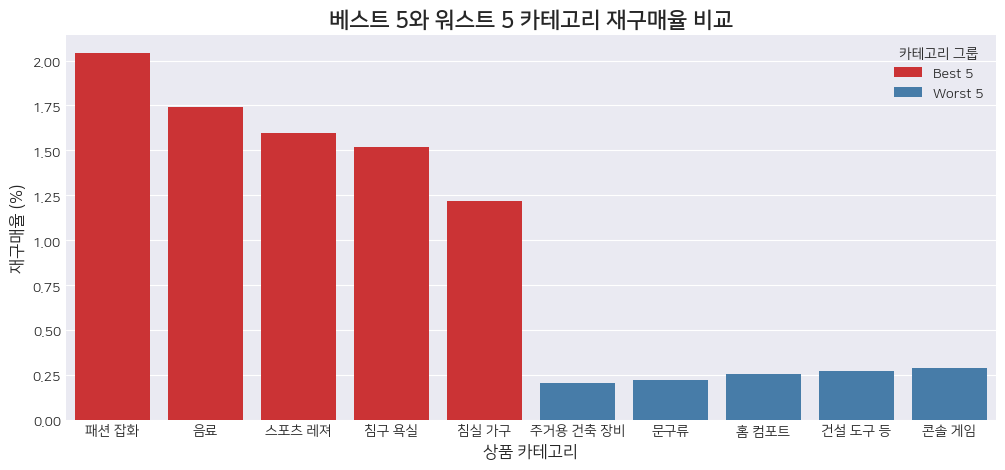

In [ ]:
# 베스트 5와 워스트 5 카테고리 비교 시각화
plt.figure(figsize=(12, 5))
combined = pd.concat([best5_repurchase_rate.assign(Category='Best 5'), worst5_repurchase_rate.assign(Category='Worst 5')])
sns.barplot(x='product_category_name_english', y='재구매율', hue='Category', data=combined, palette='Set1')

plt.title('베스트 5와 워스트 5 카테고리 재구매율 비교', fontsize=16, fontweight='bold')
plt.xlabel('상품 카테고리', fontsize=12)
plt.ylabel('재구매율 (%)', fontsize=12)
plt.legend(title='카테고리 그룹')
plt.show()


- **패션 잡화, 음료, 스포츠 레져** 제품과 같은 카테고리는 재구매율이 2%에 가까우며, 이는 고객들이 이러한 제품을 반복적으로 구매하는 경향이 있음을 나타냄. 반면, 주거용 건축 장비와 같은 카테고리는 재구매율이 0.2%에 불과하여, 고객들이 해당 카테고리의 제품을 자주 재구매하지 않음을 보여줌.

- 일반적으로 생활용품 및 개인적인 취향이 반영되는 제품군의 경우 소비자들이 주기적으로 새로운 제품을 구매하는 경향이 있을 수 있음. 반면, 건설 장비나 문구류 등은 한번 구매하면 오랜 기간 사용할 수 있는 제품들이며, 이러한 제품들은 재구매 주기가 길어 재구매율이 낮음.

#### 3.2.2) 재구매 주기 분석

In [ ]:
# 재구매율 상위 20개 카테고리
top_categories = repurchase_rate_category.nlargest(20, '재구매율')['product_category_name_english']

In [ ]:
# 재구매 주기 계산
copy_full_df['repurchase_cycle_day'] = (pd.to_datetime(copy_full_df['order_purchase_date']) - pd.to_datetime(copy_full_df['first_purchase_date'])).dt.days

# 재구매 주기가 있는 경우만 필터링
repurchase_df = copy_full_df[copy_full_df['repurchase_yn'] == True]

# 카테고리별 평균 재구매 주기 계산
repurchase_cycle_category = repurchase_df.groupby('product_category_name_english', as_index=False).agg(
    평균재구매주기 = ('repurchase_cycle_day', 'mean')
)

# 구매 고객 수 기준 상위 20개 카테고리에 대해서만 필터링
top_repurchase_cycle_category = repurchase_cycle_category[repurchase_cycle_category['product_category_name_english'].isin(top_categories)]

# 카테고리명 한국어로 조정
top_repurchase_cycle_category['product_category_name_english'] = top_repurchase_cycle_category['product_category_name_english'].map(
    {'health_beauty':'미용·건강',
     'watches_gifts':'시계',
     'bed_bath_table':'침구·욕실',
     'sports_leisure':'레져',
     'computers_accessories':'컴퓨터 악세서리',
     'furniture_decor':'가구 데코',
     'housewares':'가정용품',
     'cool_stuff':'스마트 기기',
     'auto':'자동차 용품',
     'garden_tools':'정원 용품',
     'toys':'장난감',
     'baby':'육아',
     'perfumery':'향수',
     'telephony':'통신기기',
     'office_furniture':'사무용 가구',
     'computers':'컴퓨터 기기',
     'stationery':'사무용품',
     'pet_shop':'반려동물 용품',
     'musical_instruments':'악기 등',
     'small_appliances':'소형가전',
     'books_general_interest':'도서',
     'costruction_tools_garden':'건설 도구 및 정원 용품',
     'drinks':'음료',
     'fashion_bags_accessories':'패션 잡화',
     'fashion_male_clothing':'남성 의류',
     'fashion_shoes':'신발',
     'furniture_living_room':'실내 가구',
     'home_appliances':'가전'}
).fillna(top_repurchase_cycle_category['product_category_name_english'])

<ipython-input-9-70c1ebc24a05>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_repurchase_cycle_category['product_category_name_english'] = top_repurchase_cycle_category['product_category_name_english'].map(


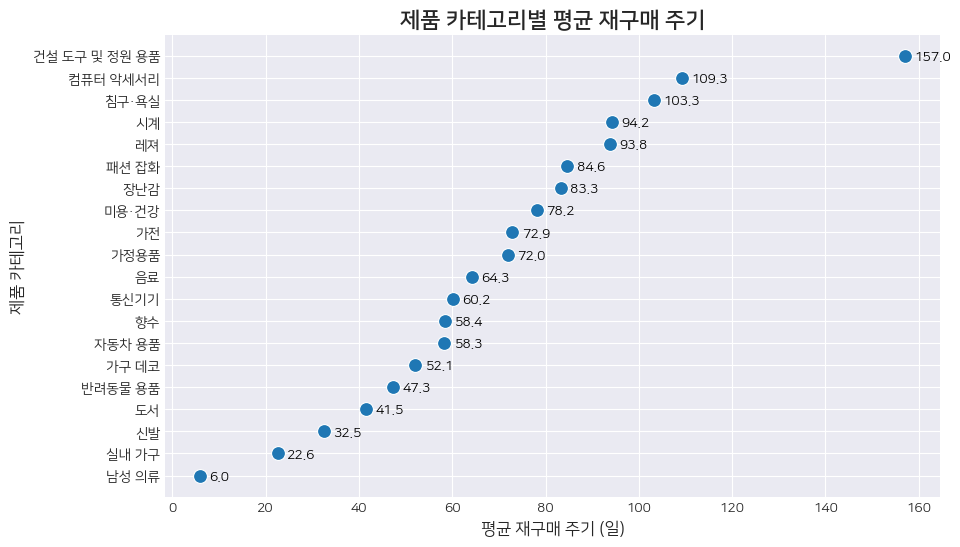

In [ ]:
# 평균 재구매 주기 데이터를 정렬
top_repurchase_cycle_category = top_repurchase_cycle_category.sort_values(by='평균재구매주기', ascending=False)

# Scatter plot 시각화
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='평균재구매주기', y='product_category_name_english', data=top_repurchase_cycle_category, s=100)

# 각 점 옆에 실제 값 표시
for index, row in top_repurchase_cycle_category.iterrows():
    scatter_plot.text(
        row['평균재구매주기']+2,  # X축 위치 (약간 왼쪽 으로 이동)
        row['product_category_name_english'],  # 정확한 Y축 위치
        f"{row['평균재구매주기']:.1f}",  # 실제 값
        color='black',  # 텍스트 색상
        ha='left',  # 수평 정렬
        va='center',  # 수직 정렬
        fontsize=10  # 텍스트 크기
    )

# 제목 및 라벨 설정
plt.title('제품 카테고리별 평균 재구매 주기', fontsize=16, fontweight='bold')
plt.xlabel('평균 재구매 주기 (일)', fontsize=12)
plt.ylabel('제품 카테고리', fontsize=12)

# 그래프 표시
plt.show()

**남성 의류 (6일), 실내 가구 (22.6일), 신발 (32.5일), 도서 (41.5일)**
- 이 카테고리들은 재구매 주기가 상대적으로 짧음. 특히 남성 의류와 신발은 패션 트렌드 변화나 계절적인 이유로 자주 구매되는 경향이 있음. 실내 가구의 경우도 주기적으로 인테리어를 바꾸거나 가구를 교체하는 수요가 있는 것으로 보임. 도서는 비교적 가격이 낮고, 다양한 주제의 책을 자주 구매할 가능성이 있어 재구매 주기가 짧을 수 있을 것으로 보임.

<br>

**건설 도구 및 정원 용품 (157일), 컴퓨터 악세서리 (109.26일), 침구·욕실 (103.27일), 레져 (93.76일)**
- 이 카테고리들은 재구매 주기가 길며, 주로 내구성이 강한 제품들이 포함되어 있음. 건설 도구나 정원 용품은 자주 교체할 필요가 없기 때문에 재구매 주기가 길고, 컴퓨터 악세서리도 기술 발전에 따라 업그레이드할 필요가 있을 때만 구매될 가능성이 있음. 침구나 욕실 용품은 계절 또는 사용 주기에 따라 주기적으로 교체할 수 있지만 빈도는 낮음.

<br>

**전반적인 인사이트**
- 이를 통해 각 카테고리별로 마케팅 전략을 다르게 설정할 필요가 있음. 예를 들어, 재구매 주기가 짧은 상품은 고객 유지를 위한 자주적인 프로모션이 효과적일 수 있으며, 재구매 주기가 긴 상품은 제품 교체나 업그레이드 시기를 겨냥한 마케팅이 유리할 수 있음.

<br>

**추천 마케팅 전략**
- 단기 재구매 유도: 남성 의류, 신발, 실내 가구 같은 재구매 주기가 짧은 카테고리에서는 할인 쿠폰, 멤버십 혜택 등을 제공하여 충성 고객을 확보하는 것이 중요.
- 리마인더 마케팅: 자동차 용품, 향수, 통신기기 등은 재구매 시점에 맞춰 리마인더 이메일이나 알림을 통해 고객의 재구매를 유도할 수 있음.
- 장기 제품 업그레이드 제안: 건설 도구, 컴퓨터 악세서리 같은 주기가 긴 카테고리에서는 업그레이드 또는 새로운 제품을 소개하는 마케팅 전략이 효과적일 수 있음.


## 4) 판매자 성과 분석

**분석 목표**
- 판매자 성과 평가: 각 판매자의 매출, 주문 처리, 고객 피드백 등을 분석하여 성과를 평가.
- 배송 효율성 분석: 판매자가 제때 상품을 발송하고 있는지, 배송 시간이 예상 범위 내에 있는지를 분석.
- 제품 포트폴리오 분석: 특정 판매자의 어떤 제품이 더 많이 팔리고 있는지, 성과가 저조한 제품은 무엇인지를 분석.

### 4.1) 기술 통계 분석
: 매출액, 배송 성과, 고객 만족도 분석 등을 통해 판매자의 전반적 성과 파악

In [ ]:
# 주문 취소건 제거
copy_full_df = copy_full_df[copy_full_df['order_status'] != 'canceled']

#### 4.1.1) 판매자 수 추이 확인

In [ ]:
# 날짜 열을 datetime 형식으로 변환
copy_full_df['order_purchase_timestamp'] = pd.to_datetime(copy_full_df['order_purchase_timestamp'])

# 월 단위 집계
copy_full_df['order_purchase_month'] = copy_full_df['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()

# 월별 판매자 수 집계
seller_count_per_time = copy_full_df.groupby('order_purchase_month', as_index=False)['seller_id'].nunique()
seller_count_per_time.columns = ['order_purchase_month', 'seller_cnt']

In [ ]:
seller_count_per_time

,order_purchase_month,seller_cnt
0,2016-09-01,2
1,2016-10-01,138
2,2016-12-01,1
3,2017-01-01,226
4,2017-02-01,425
5,2017-03-01,490
6,2017-04-01,503
7,2017-05-01,577
8,2017-06-01,534
9,2017-07-01,602


<ipython-input-13-590e53ee3c18>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


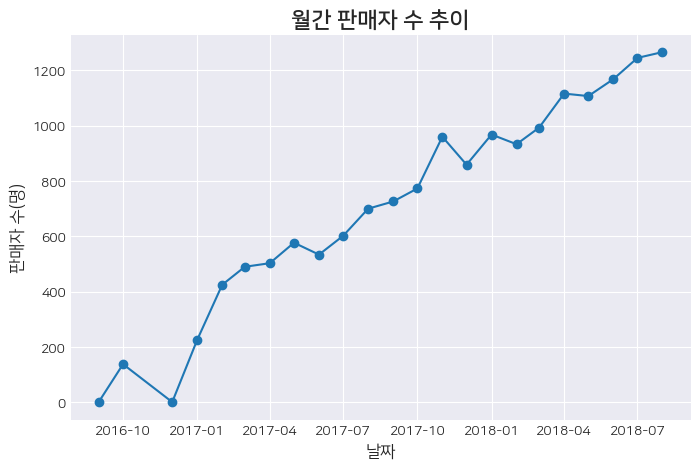

In [ ]:
## 월별 판매자 수 추이 시각화
# 스타일
plt.style.use('seaborn-darkgrid')
plt.rc('font', family='NanumSquare') # 한글 폰트 지정

# 그래프 크기
plt.figure(figsize=(8, 5))

plt.plot(seller_count_per_time['order_purchase_month'], seller_count_per_time['seller_cnt'], linestyle='-', marker='o')


# 제목 및 레이블, 범례 등 지정
plt.title('월간 판매자 수 추이', fontsize=16, fontweight='bold')
plt.xlabel('날짜', fontdict={'size':12})
plt.ylabel('판매자 수(명)', fontdict={'size':12})

## 표시할 날짜 범위 설정
# 3개월 간격으로 표시할 레이블 생성
xticks_labels = pd.date_range(start='2016-10', end='2018-09', freq='3M').strftime('%Y-%m')
# x축 레이블 설정: 3개월 간격으로
plt.xticks(ticks=pd.to_datetime(xticks_labels), labels=xticks_labels)

plt.show()

#### 4.1.2) 매출 상위 판매자

In [ ]:
# 매출 상위 판매자 추출
seller_revenue_top = copy_full_df.groupby(['seller_id', 'product_category_name_english'], as_index=False)['price'].sum().sort_values('price', ascending=False).head(20)
seller_revenue_top['seller_id_short'] = seller_revenue_top['seller_id'].str[:6]
seller_revenue_top['seller_id_short'] = seller_revenue_top['seller_id_short'] + '\n' + '(' + seller_revenue_top['product_category_name_english'] + ')'

In [ ]:
seller_revenue_top

,seller_id,product_category_name_english,price,seller_id_short
1770,4869f7a5dfa277a7dca6462dcf3b52b2,시계,208499.73,4869f7\n(시계)
6197,fa1c13f2614d7b5c4749cbc52fecda94,시계,202034.93,fa1c13\n(시계)
2079,53243585a1d6dc2643021fd1853d8905,컴퓨터 기기,186720.23,532435\n(컴퓨터 기기)
3153,7c67e1448b00f6e969d365cea6b010ab,사무용 가구,184148.97,7c67e1\n(사무용 가구)
1812,4a3ca9315b744ce9f8e9374361493884,침구·욕실,177739.10,4a3ca9\n(침구·욕실)
3222,7e93a43ef30c4f03f38b393420bc753a,시계,175984.37,7e93a4\n(시계)
5370,da8622b14eb17ae2831f4ac5b9dab84a,침구·욕실,163766.10,da8622\n(침구·욕실)
3099,7a67c85e85bb2ce8582c35f2203ad736,스마트 기기,143485.98,7a67c8\n(스마트 기기)
389,1025f0e2d44d7041d6cf58b6550e0bfa,가구 데코,115533.43,1025f0\n(가구 데코)
778,1f50f920176fa81dab994f9023523100,정원 용품,107522.41,1f50f9\n(정원 용품)


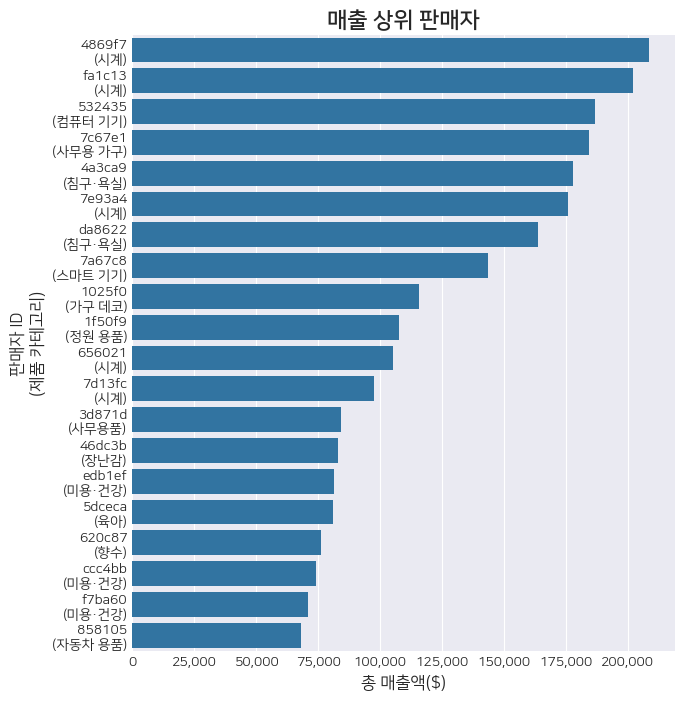

In [ ]:
# 매출 상위 판매자 추출
seller_revenue_top = copy_full_df.groupby(['seller_id', 'product_category_name_english'], as_index=False)['price'].sum().sort_values('price', ascending=False).head(20)
seller_revenue_top['seller_id_short'] = seller_revenue_top['seller_id'].str[:6]
seller_revenue_top['product_category_name_english'] = seller_revenue_top['product_category_name_english'].map(
    {'health_beauty':'미용·건강',
     'watches_gifts':'시계',
     'bed_bath_table':'침구·욕실',
     'sports_leisure':'레져',
     'computers_accessories':'컴퓨터 악세서리',
     'furniture_decor':'가구 데코',
     'housewares':'가정용품',
     'cool_stuff':'스마트 기기',
     'auto':'자동차 용품',
     'garden_tools':'정원 용품',
     'toys':'장난감',
     'baby':'육아',
     'perfumery':'향수',
     'telephony':'통신기기',
     'office_furniture':'사무용 가구',
     'computers':'컴퓨터 기기',
     'stationery':'사무용품',
     'pet_shop':'반려동물 용품',
     'musical_instruments':'악기 등',
     'small_appliances':'소형가전'}
).fillna(seller_revenue_top['product_category_name_english'])


seller_revenue_top['seller_id_short'] = seller_revenue_top['seller_id_short'] + '\n' + '(' + seller_revenue_top['product_category_name_english'] + ')'

# 시각화
plt.figure(figsize=(7, 8))
sns.barplot(y='seller_id_short', x='price', data=seller_revenue_top)
plt.title('매출 상위 판매자', fontsize=16, fontweight='bold')
plt.xlabel('총 매출액($)', fontsize=12)
plt.ylabel('판매자 ID\n(제품 카테고리)', fontsize=12)

# 천의 단위 쉼표
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))


- 시계, 컴퓨터 기기, 사무용품, 자동차 용품 등 주로 고가의 제품을 판매하는 판매자의 매출이 상위에 랭크됨.

### 4.2) 군집 분석
판매자를 유사한 특성에 따라 그룹화하여 판매자 성과의 패턴을 파악

In [ ]:
## 예상 배송 시간과 실제 배송 시간의 차이 계산
# 날짜 형식 변환
copy_full_df['order_delivered_customer_date'] = pd.to_datetime(copy_full_df['order_delivered_customer_date'])
copy_full_df['order_estimated_delivery_date'] = pd.to_datetime(copy_full_df['order_estimated_delivery_date'])

# 배송 차이 계산
copy_full_df['delivery_delay'] = (copy_full_df['order_delivered_customer_date'] - copy_full_df['order_estimated_delivery_date']).dt.days

# 배송 지연 여부
copy_full_df['delivery_delay_yn'] = copy_full_df['delivery_delay'] > 0

In [ ]:
## 판매자 성과 종합
seller_performance_df = copy_full_df.groupby('seller_id').agg(
    총매출액 = ('price', 'sum'),
    구매고객수 = ('customer_unique_id', 'nunique'),
    배송지연비율 = ('delivery_delay_yn', 'mean'),
    배송지연일수 = ('delivery_delay', 'mean'),
    리뷰평점 = ('review_score', 'mean')
)

# 열 이름에 특수문자 추가 (표시용)
seller_performance_df.columns = ['총 매출액($)', '구매 고객 수', '배송 지연 비율(%)', '배송 지연 일수(일)', '리뷰 평점']


# 리뷰 평점에 결측이 있는 경우는 전체 리뷰 평균값으로 대치
seller_performance_df['리뷰 평점'] = seller_performance_df['리뷰 평점'].fillna(seller_performance_df['리뷰 평점'].mean())

# 배송 시간에 결측이 있는 경우는 전체 배송 시간 평균값으로 대치
seller_performance_df['배송 지연 일수(일)'] = seller_performance_df['배송 지연 일수(일)'].fillna(seller_performance_df['배송 지연 일수(일)'].mean())

# 배송 지연 비율은 퍼센트(%) 값으로 변환
seller_performance_df['배송 지연 비율(%)'] = seller_performance_df['배송 지연 비율(%)']*100

# 데이터 표준화
scaler = StandardScaler()
df_scaled = scaler.fit_transform(seller_performance_df)

# K-평균 군집 분석
kmeans = KMeans(n_clusters=5, random_state=42)
seller_performance_df['cluster'] = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
cluster_result_log

,총 매출액($),구매 고객 수,배송 지연 비율(%),배송 지연 일수(일),리뷰 평점,판매자 수
군집1,0.011148,0.014590,0.001892,0.015592,0.352793,0.0
군집2,0.000000,0.000000,0.352793,0.352793,0.141834,0.0
군집3,0.148758,0.155796,0.040042,0.042885,0.332026,0.0
군집4,0.352793,0.352793,0.046880,0.077073,0.329899,0.0
군집5,0.002916,0.002958,0.000000,0.000000,0.000000,0.0


In [ ]:
cluster_result

,총매출액($),배송지연비율(%),배송지연일수(일),리뷰평점,판매자 수
군집1,1903.298438,0.781805,-14.892875,4.523331,1613
군집2,7675.062097,10.479958,-9.235313,3.919351,1011
군집3,896.560957,72.023944,8.688769,2.428422,94
군집4,946.987815,1.056831,-14.881590,2.040366,357
군집5,151084.755500,6.738248,-11.678452,4.057603,20


In [ ]:
cluster_result

,총 매출액($),구매 고객 수,배송 지연 비율(%),배송 지연 일수(일),리뷰 평점,판매자 수
군집1,2596.393274,18.517766,3.737190,-13.035674,4.360580,2364
군집2,891.411293,3.250000,65.801414,6.680572,2.668892,116
군집3,32185.607676,230.140845,6.324088,-12.418830,4.064804,142
군집4,150426.921053,1019.210526,6.833126,-11.536799,4.037170,19
군집5,1329.976762,6.273128,3.619078,-13.358154,2.256652,454


In [ ]:
# 군집별 평균값 집계
cluster_result = seller_performance_df.reset_index().groupby('cluster').agg({
       '총 매출액($)': 'mean',
       '구매 고객 수': 'mean',
        '배송 지연 비율(%)': 'mean',
        '배송 지연 일수(일)': 'mean',
        '리뷰 평점': 'mean',
        'seller_id': 'count'
}).rename(columns={'seller_id': '판매자 수'})  # 컬럼 이름 변경

# 클러스터 이름 조정
cluster_result.index = ['군집1', '군집2', '군집3', '군집4', '군집5']

# 히트맵에서 수치 표시용 테이블과 시각화를 위한 테이블 구분
cluster_annot = cluster_result.copy()
cluster_display = cluster_result.copy()

# 시각화를 위한 테이블에서 수치 일부 조정(배송 지연 비율)
cluster_display.at['군집2', '배송 지연 비율(%)'] = 10

# 집계값 1차 정규화
cluster_result_normalized = (cluster_display - cluster_display.min()) / (cluster_display.max() - cluster_display.min())

# 로그 스케일 적용(값의 범위 축소 목적)
cluster_result_log = np.log1p(cluster_result_normalized)

# 히트맵 시각화를 위해 배송서비스(배송 지연 비율, 배송 지연 일수)의 경우 낮을수록 색이 진하게 표시되도록
cluster_result_log['배송 지연 비율(%)'] = 1 - cluster_result_log['배송 지연 비율(%)']
cluster_result_log['배송 지연 일수(일)'] = 1 - cluster_result_log['배송 지연 일수(일)']

# 집계값 2차 정규화
cluster_result_normalized_2 = (cluster_result_log - cluster_result_log.min()) / (cluster_result_log.max() - cluster_result_log.min())
cluster_result_normalized_2['판매자 수'] = 0

In [ ]:
cluster_display

,총 매출액($),구매 고객 수,배송 지연 비율(%),배송 지연 일수(일),리뷰 평점,판매자 수
군집1,2596.393274,18.517766,3.737190,-13.035674,4.360580,2364
군집2,891.411293,3.250000,10.000000,6.680572,2.668892,116
군집3,32185.607676,230.140845,6.324088,-12.418830,4.064804,142
군집4,150426.921053,1019.210526,6.833126,-11.536799,4.037170,19
군집5,1329.976762,6.273128,3.619078,-13.358154,2.256652,454


In [ ]:
cluster_result_log

,총 매출액($),구매 고객 수,배송 지연 비율(%),배송 지연 일수(일),리뷰 평점,판매자 수
군집1,0.768926,0.624184,0.507885,NaN,0.522273,0.767373
군집2,0.749640,0.494165,0.680152,0.558109,0.473671,0.699168
군집3,0.803384,0.718751,0.553811,NaN,0.515821,0.705295
군집4,0.819535,0.752264,0.559853,NaN,0.515185,0.625561
군집5,0.757288,0.553169,0.504790,NaN,0.455153,0.735337


<ipython-input-55-8cfe1e5843e3>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  other_columns_formatted = cluster_annot.drop(columns=['판매자 수']).applymap(format_value)


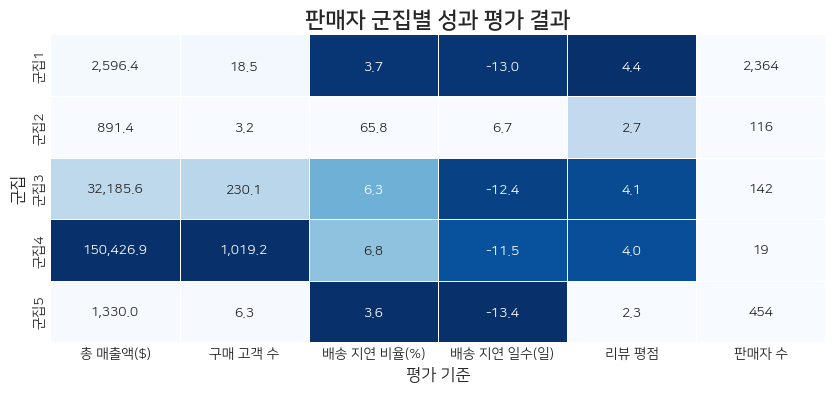

In [ ]:


# 각 칼럼에 대한 포맷팅
def format_value(value, is_seller_count=False):
    if is_seller_count:
        return f"{int(value):,.0f}"  # 정수로 표시
    else:
        return f"{value:,.1f}"  # 소수점 첫째자리까지 표시

# 판매자 수 포맷팅
seller_count_formatted = cluster_annot['판매자 수'].apply(lambda x: format_value(x, is_seller_count=True))

# 나머지 칼럼 포맷팅
other_columns_formatted = cluster_annot.drop(columns=['판매자 수']).applymap(format_value)

# 포맷팅된 결과 합치기
cluster_result_formatted = pd.concat([other_columns_formatted, seller_count_formatted.rename('판매자 수')], axis=1)

# 히트맵 시각화
plt.figure(figsize=(10, 4))
sns.heatmap(cluster_result_normalized_2, annot=cluster_result_formatted, fmt="", cmap="Blues", linewidths=0.5, cbar=False)

# 그래프 제목 및 레이블 설정
plt.title('판매자 군집별 성과 평가 결과', fontsize=16, fontweight='bold')
plt.xlabel('평가 기준', fontsize=12)
plt.ylabel('군집', fontsize=12)

plt.show()


**판매자 군집화 분석 결과 해석**
- 군집 1
  - 배송 지연율은 낮고 배송이 빠르지만, 낮은 리뷰 평점을 보이는 것으로 보아 고객 불만이 높아 제품 품질이나 서비스 문제일 가능성이 커보임.
- 군집 2
  - 배송 성과가 우수하며, 리뷰 평점이 매우 높아 제품과 서비스의 품질도 좋다고 볼 수 있음. 매출 수준은 아직 미미하지만 충분한 성장 잠재력이 있음.
- 군집 3
  - 배송 지연 문제가 매우 심각한 그룹. 이에 리뷰 평점도 낮은 수준을 보임. 배송 문제를 해결하지 않으면 성과 개선이 어려울 것으로 보임
- 군집 4
  - 높은 매출액을 기록하며 리뷰 평점도 매우 좋음. 배송 지연율이 다소 있지만 전반적으로 성과가 우수함. 이 그룹의 판매자들이 해당 커머스 플랫폼에서 중요한 역할을 하는 판매자들임.
- 군집 5
  - 중간 수준의 매출 규모와 괜찮은 리뷰 평점을 기록하고 있음. 배송 지연율이 다소 높아 이를 개선하면 성과가 더욱 향상될 가능성이 큼.

# 연습 노트

In [ ]:
copy_full_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

In [ ]:
# 고객별 할부 결제 패턴 분석
# 예제 데이터에 고객 ID 추가
data['customer_id'] = ['A', 'A', 'B', 'B', 'C']
df = pd.DataFrame(data)

# 고객별 평균 할부 금액
customer_installment_avg = df[df['payment_installments'] > 1].groupby('customer_id')['payment_value'].mean()

print("고객별 평균 할부 금액:")
print(customer_installment_avg)


고객별 평균 할부 금액:
customer_id
A     200.0
B     450.0
C    1200.0
Name: payment_value, dtype: float64


할부 결제 비율: 0.80
평균 할부 금액: 575.00
결제 유형 비율:
payment_type
credit_card    1.0
Name: proportion, dtype: float64
고객별 평균 할부 금액:
customer_id
A     200.0
B     450.0
C    1200.0
Name: payment_value, dtype: float64


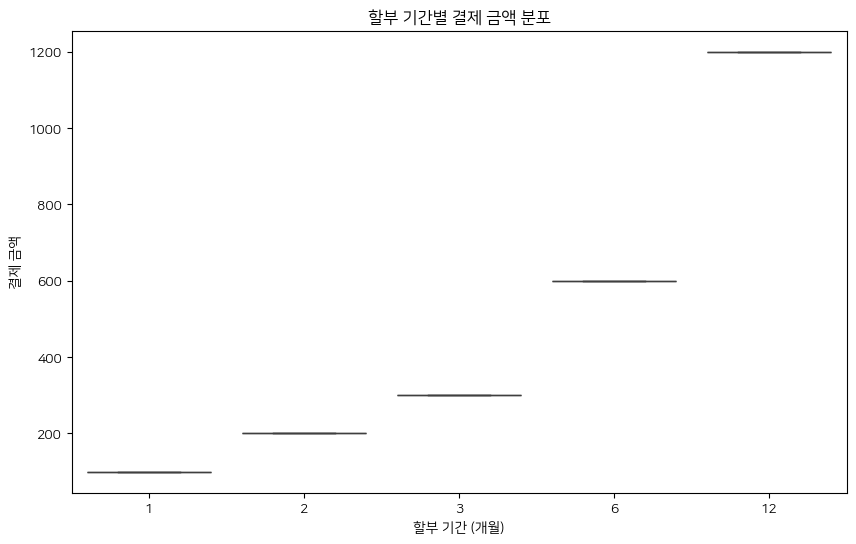

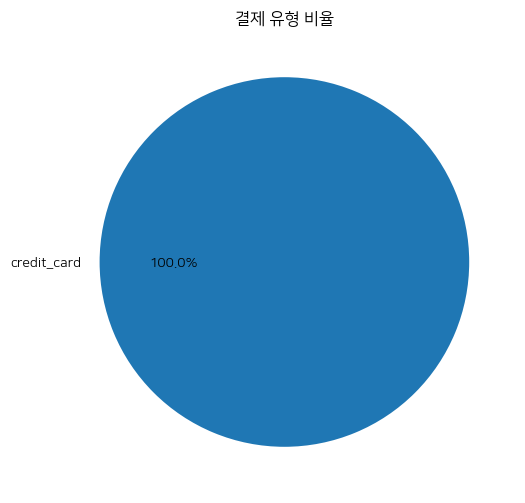

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 예제 데이터 생성
data = {
    'payment_type': ['credit_card', 'credit_card', 'credit_card', 'credit_card', 'credit_card'],
    'payment_installments': [1, 2, 3, 6, 12],
    'payment_value': [100, 200, 300, 600, 1200],
    'customer_id': ['A', 'A', 'B', 'B', 'C']
}
df = pd.DataFrame(data)

# 할부 결제 비율
total_payments = len(df)
installment_payments = len(df[df['payment_installments'] > 1])
installment_payment_ratio = installment_payments / total_payments

# 평균 할부 금액
avg_installment_amount = df[df['payment_installments'] > 1]['payment_value'].mean()

# 결제 유형별 비율 분석
payment_type_distribution = df['payment_type'].value_counts(normalize=True)

# 고객별 평균 할부 금액
customer_installment_avg = df[df['payment_installments'] > 1].groupby('customer_id')['payment_value'].mean()

print(f"할부 결제 비율: {installment_payment_ratio:.2f}")
print(f"평균 할부 금액: {avg_installment_amount:.2f}")
print("결제 유형 비율:")
print(payment_type_distribution)
print("고객별 평균 할부 금액:")
print(customer_installment_avg)

# 할부 기간별 결제 금액 분포 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='payment_installments', y='payment_value', data=df)
plt.title('할부 기간별 결제 금액 분포')
plt.xlabel('할부 기간 (개월)')
plt.ylabel('결제 금액')
plt.show()

# 결제 유형 비율 시각화
plt.figure(figsize=(8, 6))
payment_type_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('결제 유형 비율')
plt.ylabel('')
plt.show()
